# Implementing a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.b


## importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder


# # loading the data

In [2]:
train = pd.read_csv(r"C:\Users\siddartha\Downloads\house-prices-advanced-regression-techniques\train.csv")



In [3]:
test=pd.read_csv(r"C:\Users\siddartha\Downloads\house-prices-advanced-regression-techniques\test.csv")

In [4]:
test_id=test['Id']

In [5]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# # Exploing the data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Missing data

In [8]:
missing_data= train.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
data_types = train.dtypes[missing_data.index]

# Combine into a DataFrame
missing_data_df = pd.DataFrame({'Missing Data': missing_data, 'Data Type': data_types})
print(missing_data_df)

              Missing Data Data Type
PoolQC                1453    object
MiscFeature           1406    object
Alley                 1369    object
Fence                 1179    object
MasVnrType             872    object
FireplaceQu            690    object
LotFrontage            259   float64
GarageYrBlt             81   float64
GarageCond              81    object
GarageType              81    object
GarageFinish            81    object
GarageQual              81    object
BsmtFinType2            38    object
BsmtExposure            38    object
BsmtQual                37    object
BsmtCond                37    object
BsmtFinType1            37    object
MasVnrArea               8   float64
Electrical               1    object


In [9]:
impute_with_no = ["Alley", "MasVnrType", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond",
                  "PoolQC", "Fence", "MiscFeature", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]

for col in impute_with_no:
    train[col] = train[col].fillna(value="No")
    test[col] = test[col].fillna(value="No")

## Electrical data has one missing value. That will fill mode value.

In [10]:
train["Electrical"] = train["Electrical"].fillna(value=train["Electrical"].mode()[0])
test["Electrical"] = test["Electrical"].fillna(value=test["Electrical"].mode()[0])

## The numerical columns filling with mean values.

In [11]:
num_missing_columns=['LotFrontage','GarageYrBlt','MasVnrArea']
for col in num_missing_columns:
    train[col] = train[col].fillna(value=train[col].mean())
    test[col] = test[col].fillna(value=test[col].mean())

In [12]:
train.isnull().sum().sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

## That is no missing value.

In [13]:
missing_data_tst=test.isnull().sum().sort_values(ascending=False)
missing_data_tst = missing_data_tst[missing_data_tst > 0]
data_types = test.dtypes[missing_data_tst.index]

# Combine into a DataFrame
missing_data_df = pd.DataFrame({'Missing Data': missing_data_tst, 'Data Type': data_types})

# Display the result
print(missing_data_df)

              Missing Data Data Type
MSZoning                 4    object
BsmtFullBath             2   float64
BsmtHalfBath             2   float64
Functional               2    object
Utilities                2    object
Exterior2nd              1    object
BsmtFinSF2               1   float64
GarageArea               1   float64
BsmtFinSF1               1   float64
GarageCars               1   float64
TotalBsmtSF              1   float64
BsmtUnfSF                1   float64
Exterior1st              1    object
SaleType                 1    object
KitchenQual              1    object


In [14]:
test['GarageArea']=test['GarageArea'].fillna(value=test["GarageArea"].mean())
test['GarageCars']=test['GarageCars'].fillna(value=test["GarageCars"].mean())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(value=test["TotalBsmtSF"].mean())
missing_test_columns=['SaleType', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional','MSZoning']
for col in missing_test_columns:
    test[col]=test[col].fillna(value=test[col].mode()[0])

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Sale Price Distribution and apping Log transformation

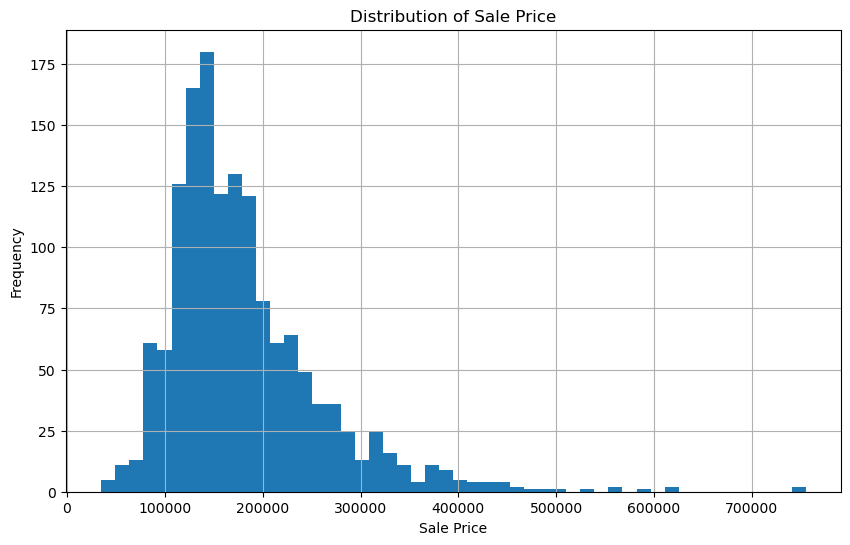

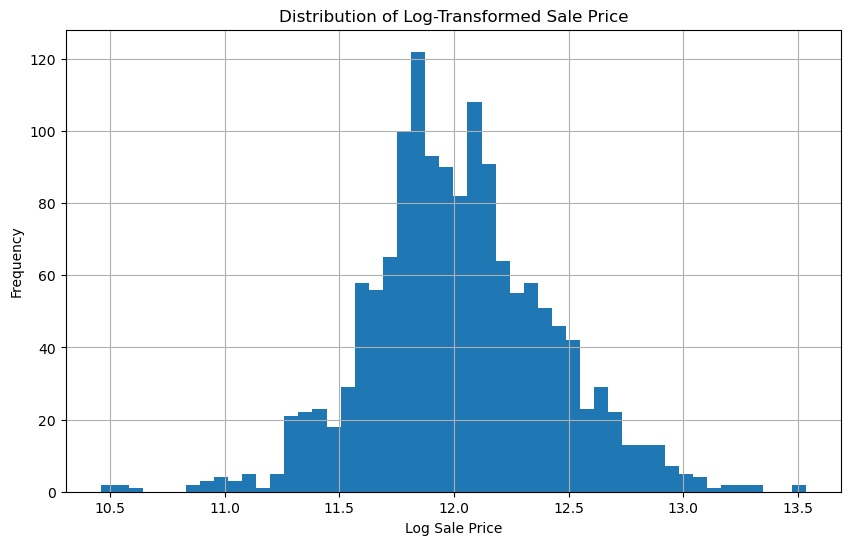

In [16]:
# Step 1: Check the distribution of Sale Price
plt.figure(figsize=(10, 6))
train['SalePrice'].hist(bins=50)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Step 2: Apply log transformation to the Sale Price
train['SalePrice'] = np.log(train['SalePrice'])

# Step 3: Check the distribution after log transformation
plt.figure(figsize=(10, 6))
train['SalePrice'].hist(bins=50)
plt.title('Distribution of Log-Transformed Sale Price')
plt.xlabel('Log Sale Price')
plt.ylabel('Frequency')
plt.show()

# Drop Column with weak correlation
## Let's look first numerical data

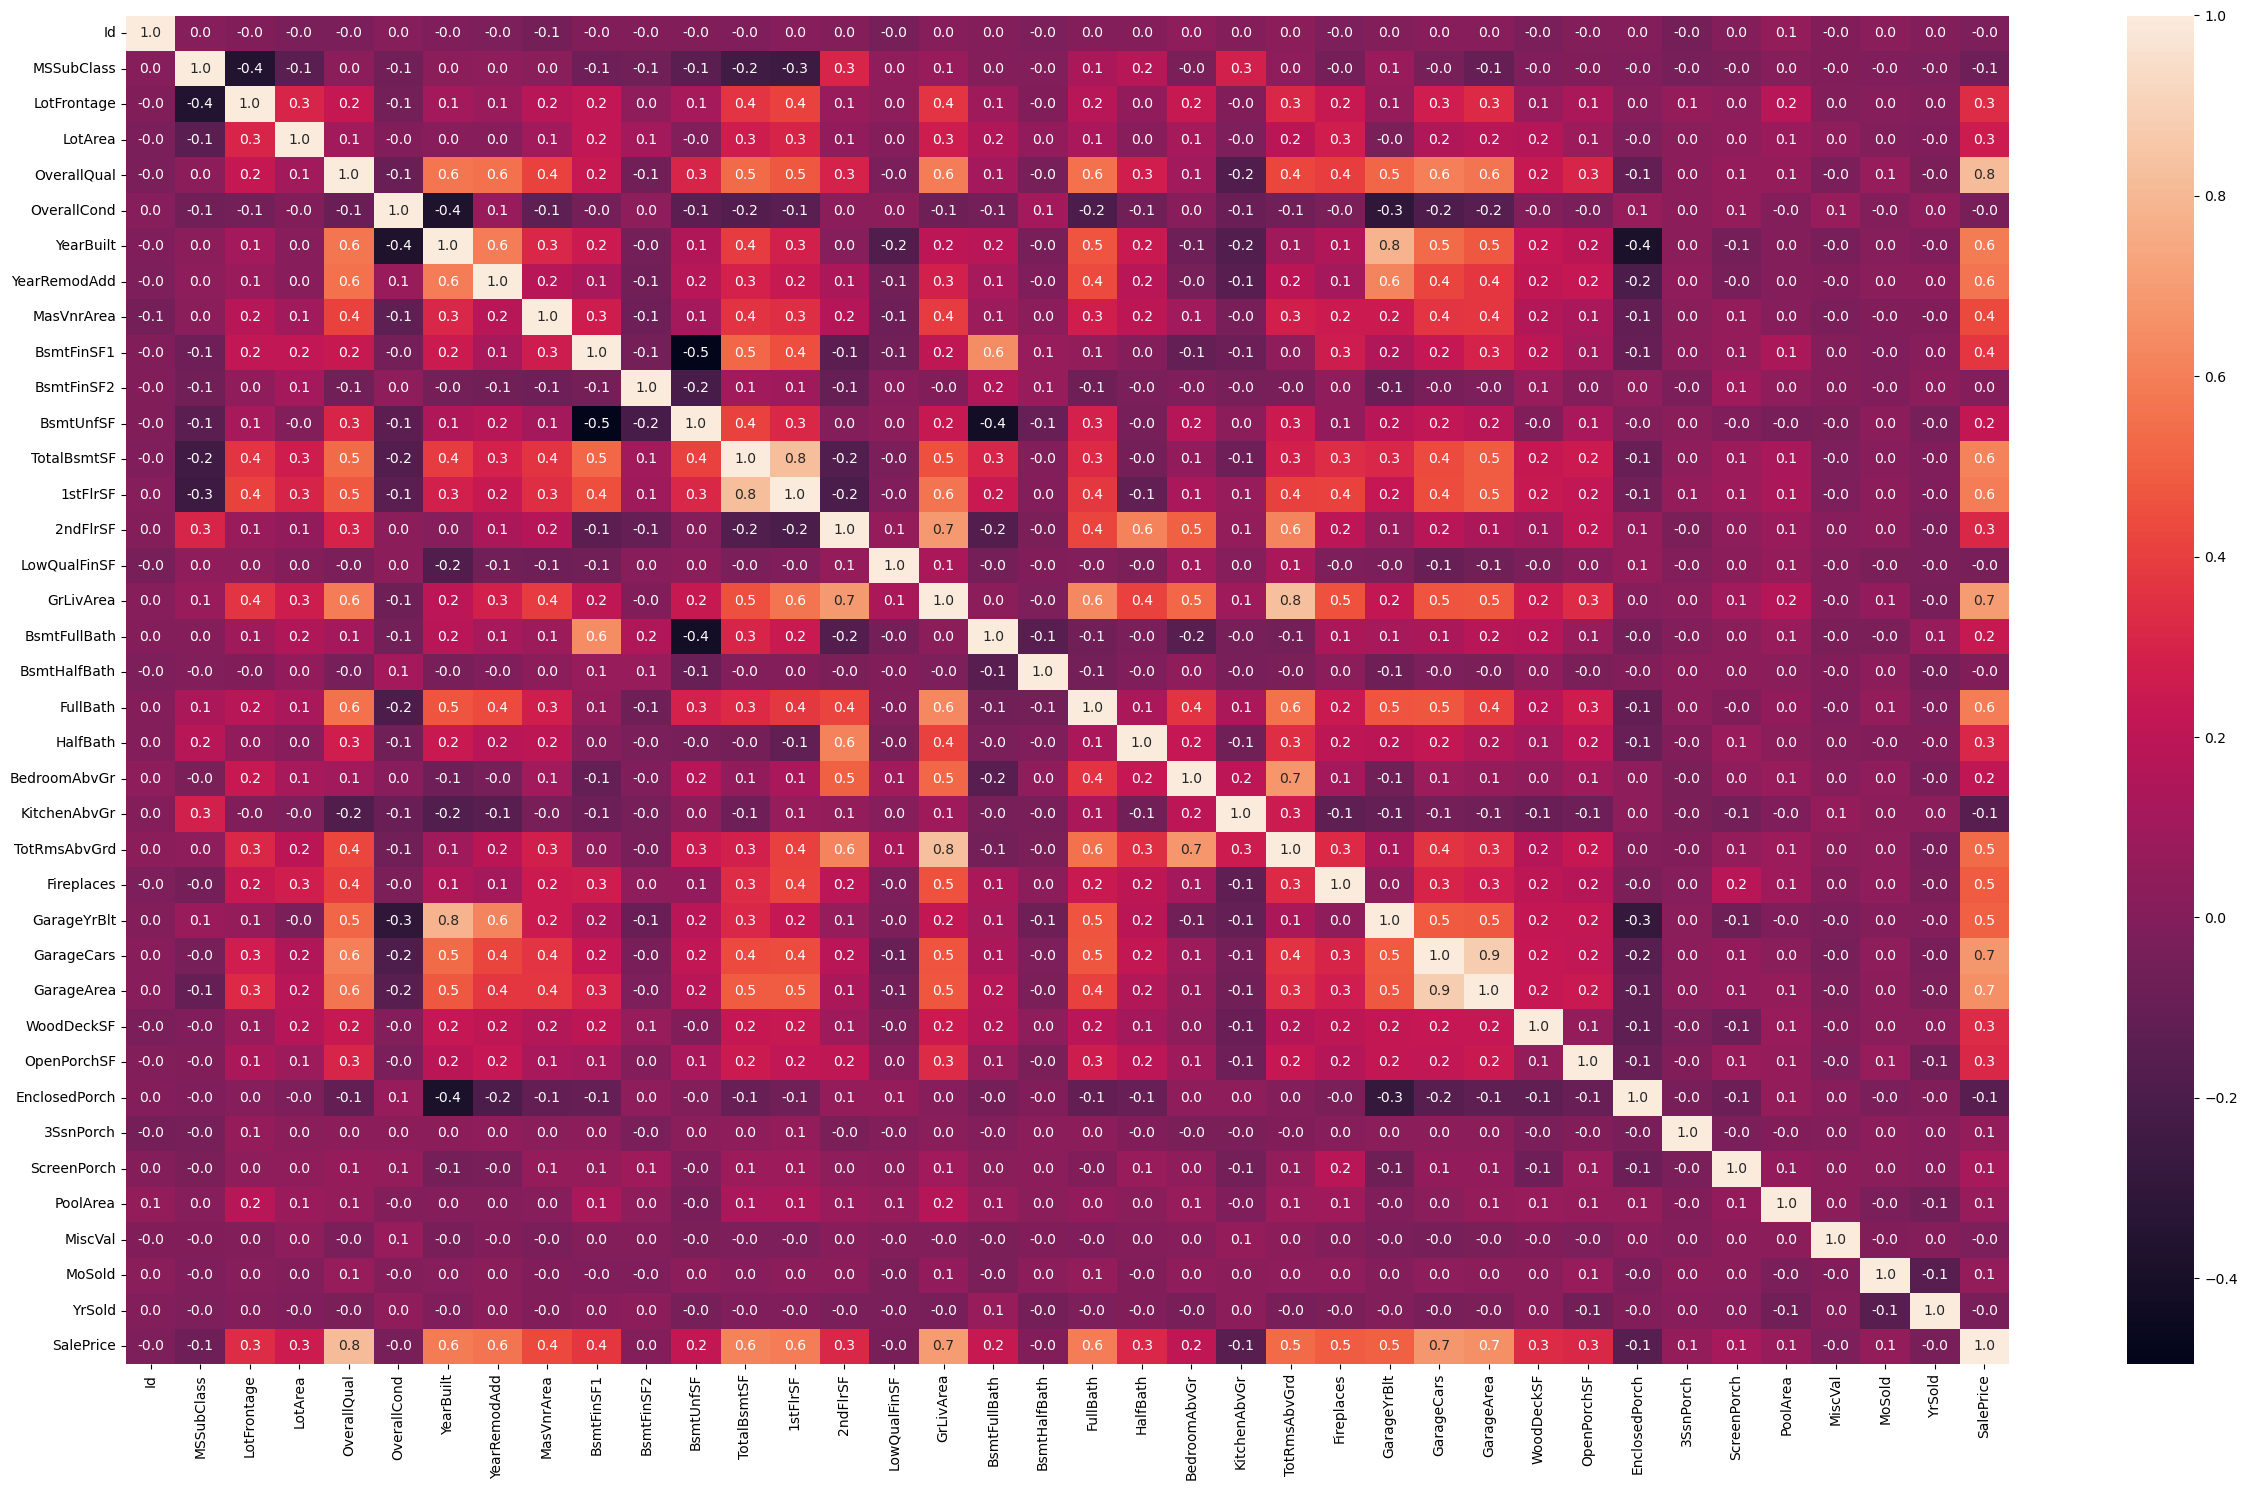

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(25,15))
sns.heatmap(train.select_dtypes(exclude="object").corr(), annot=True, fmt="1.1f")
plt.tight_layout()
plt.figure();

In [18]:
# Step 1: Filter out only the numeric columns
numeric_df = train.select_dtypes(include=['number'])

# Step 2: Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Step 3: Extract the correlation values for SalePrice
saleprice_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)


droping_columns=saleprice_correlation[saleprice_correlation<0.45].index
train=train.drop(columns=droping_columns, axis=1)
test=test.drop(columns=droping_columns, axis=1)

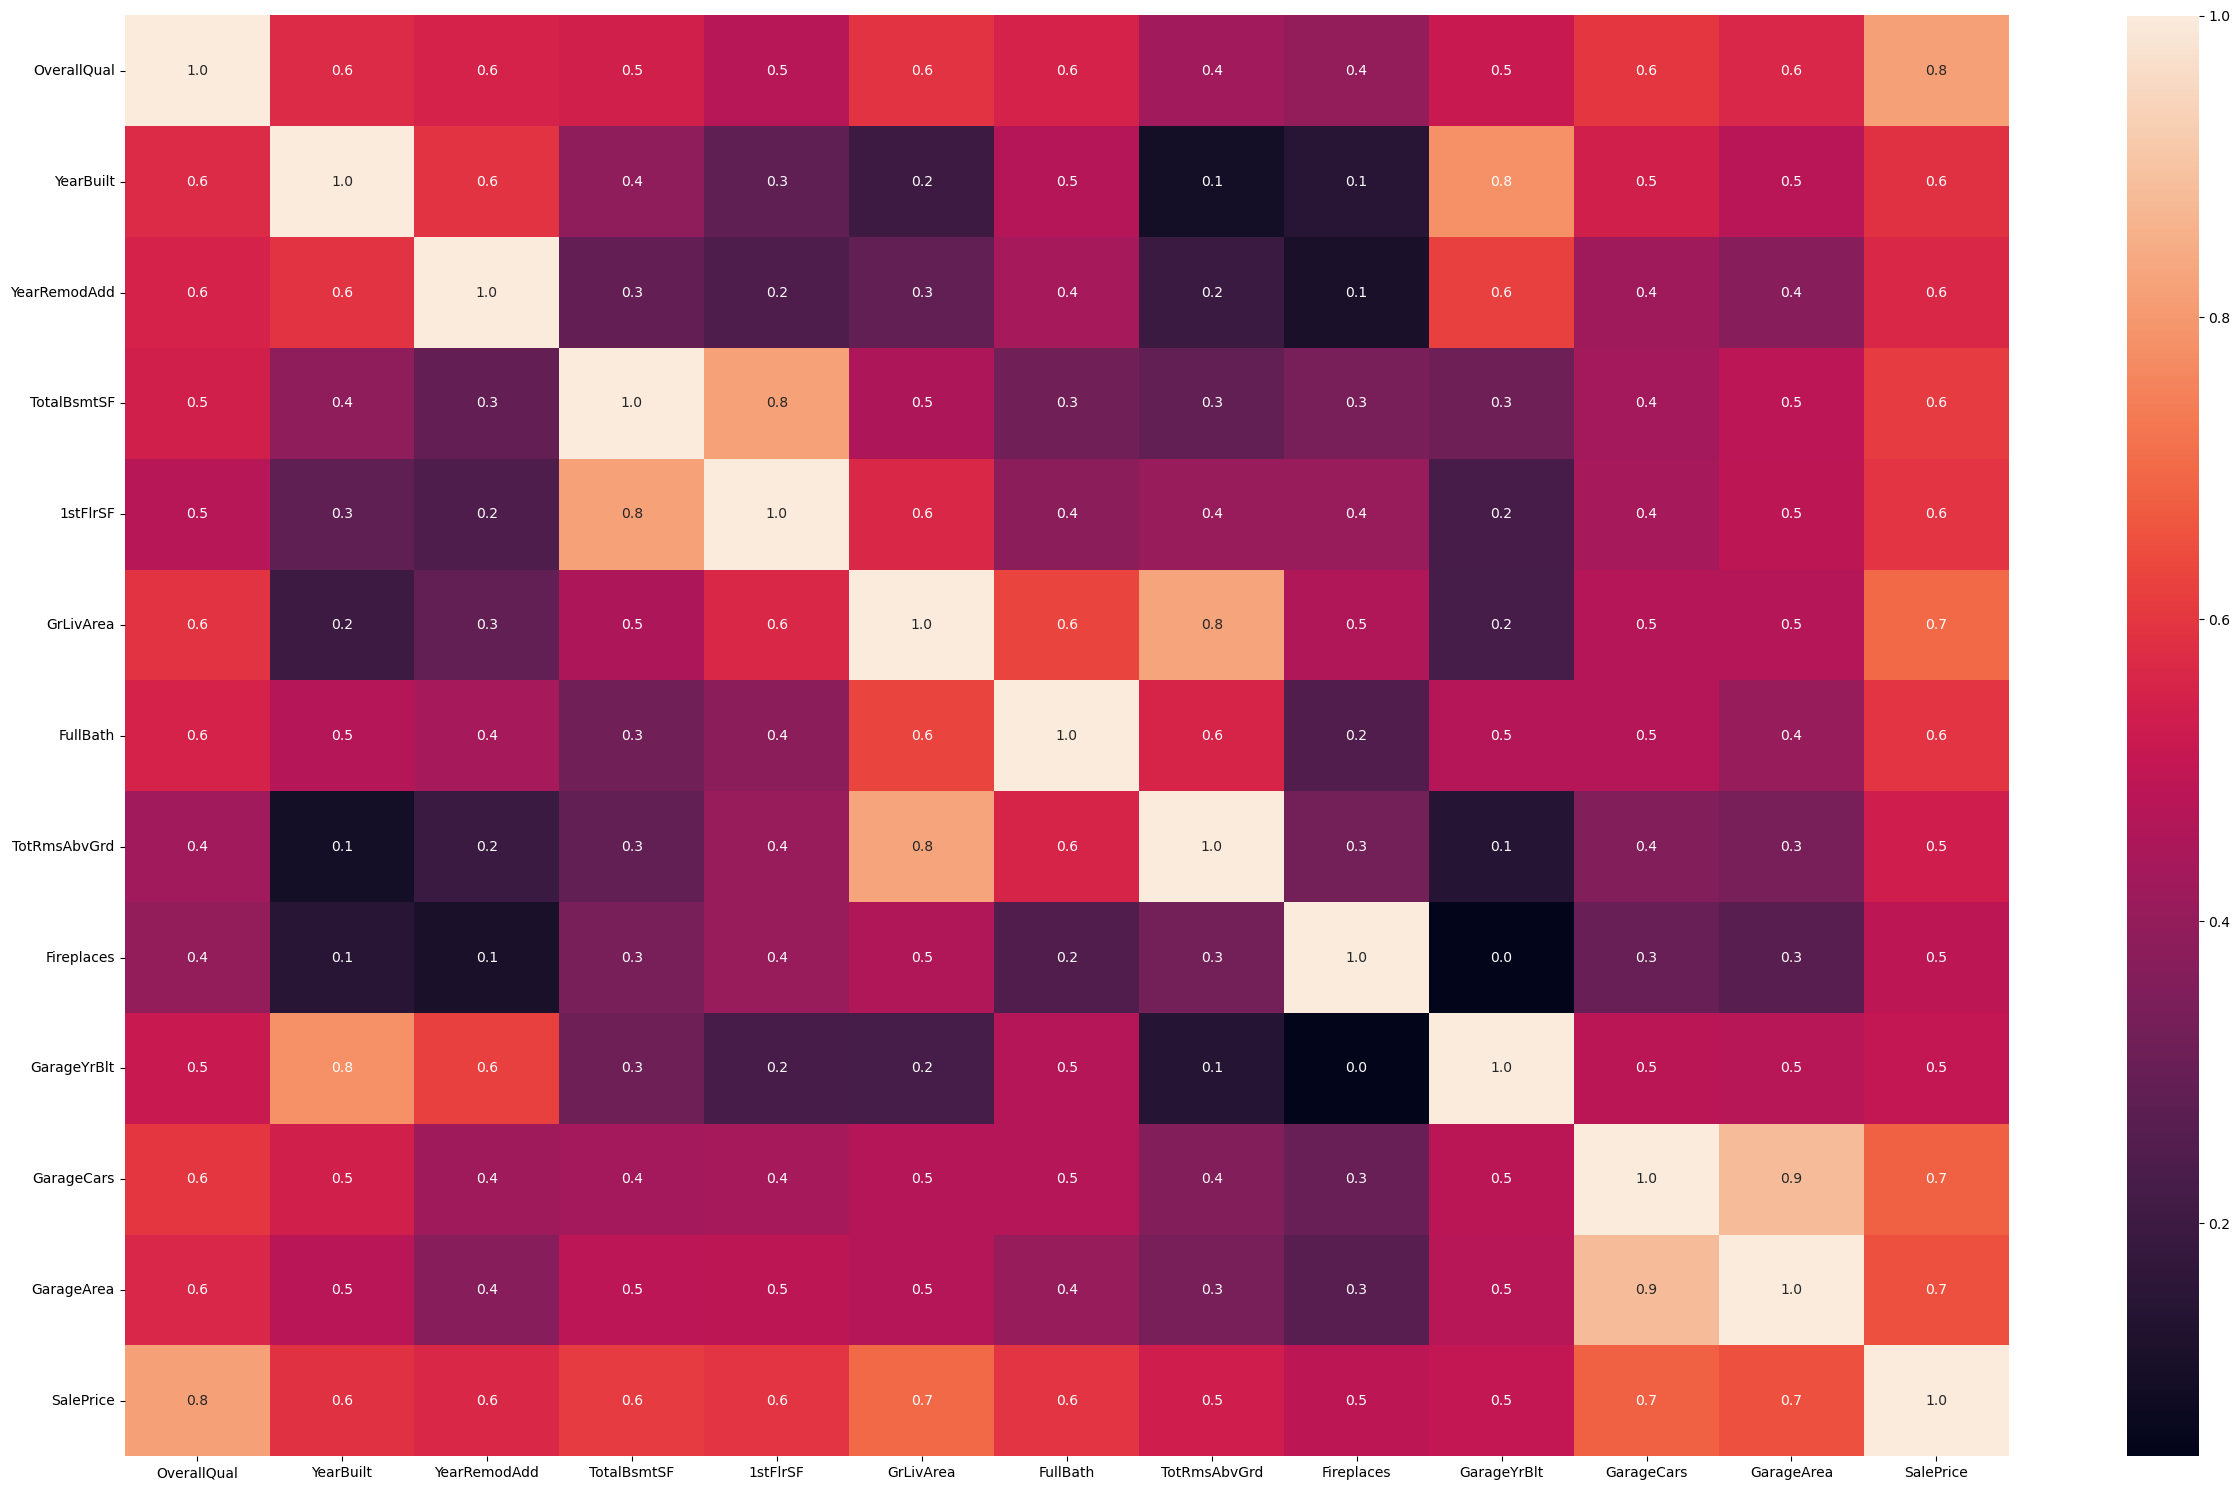

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(25,15))
sns.heatmap(train.select_dtypes(exclude="object").corr(), annot=True, fmt="1.1f")
plt.tight_layout()
plt.figure();

In [20]:
categorical_data = train.select_dtypes(exclude=[np.number])
categorical_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
drop_cat_columns=['Utilities', 'Condition2','RoofMatl', 'Street','PoolQC','MiscFeature']

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64


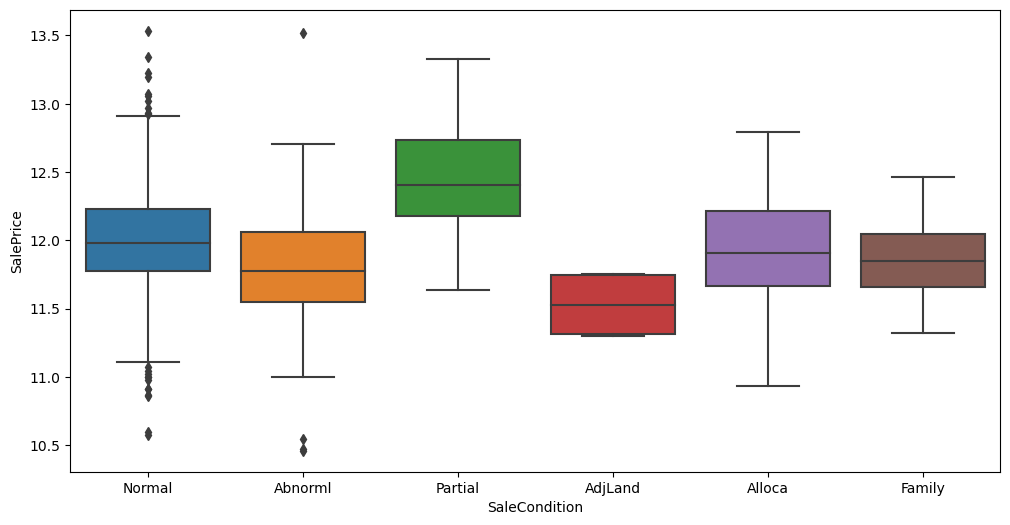

In [22]:
print(train['SaleCondition'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='SaleCondition', y='SalePrice', data=train)
plt.show()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64


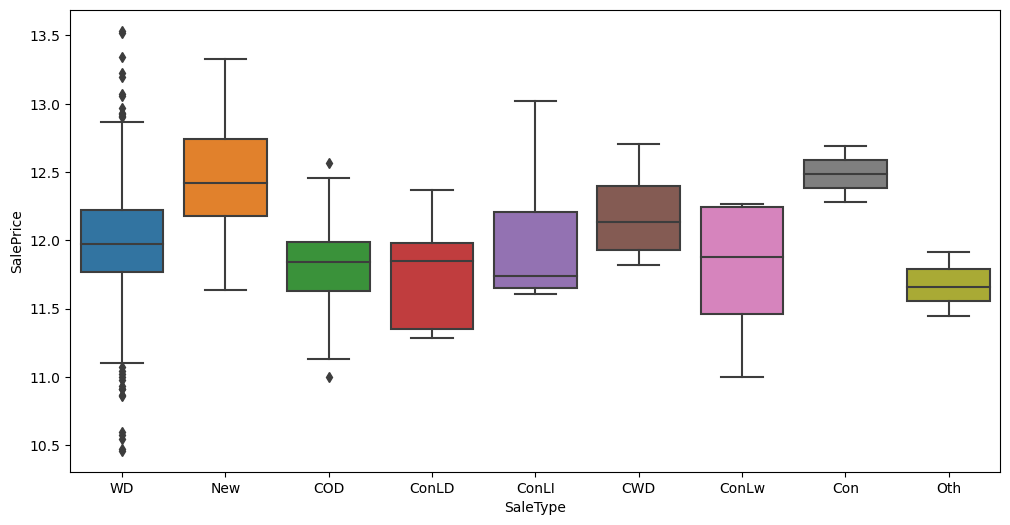

In [23]:
print(train['SaleType'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='SaleType', y='SalePrice', data=train)
plt.show()

MiscFeature
No      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64


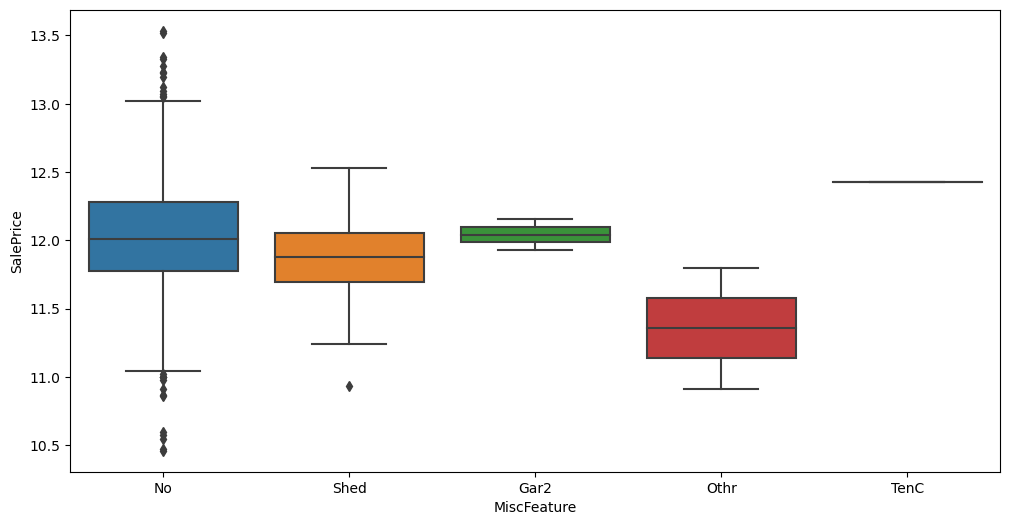

In [24]:
print(train['MiscFeature'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='MiscFeature', y='SalePrice', data=train)
plt.show()

Fence
No       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64


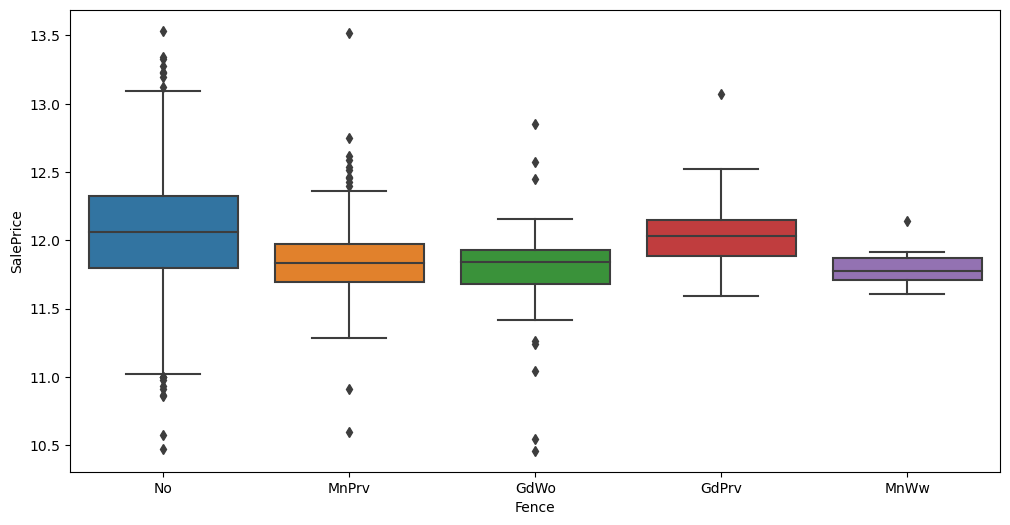

In [25]:
print(train['Fence'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fence', y='SalePrice', data=train)
plt.show()

PoolQC
No    1453
Gd       3
Ex       2
Fa       2
Name: count, dtype: int64


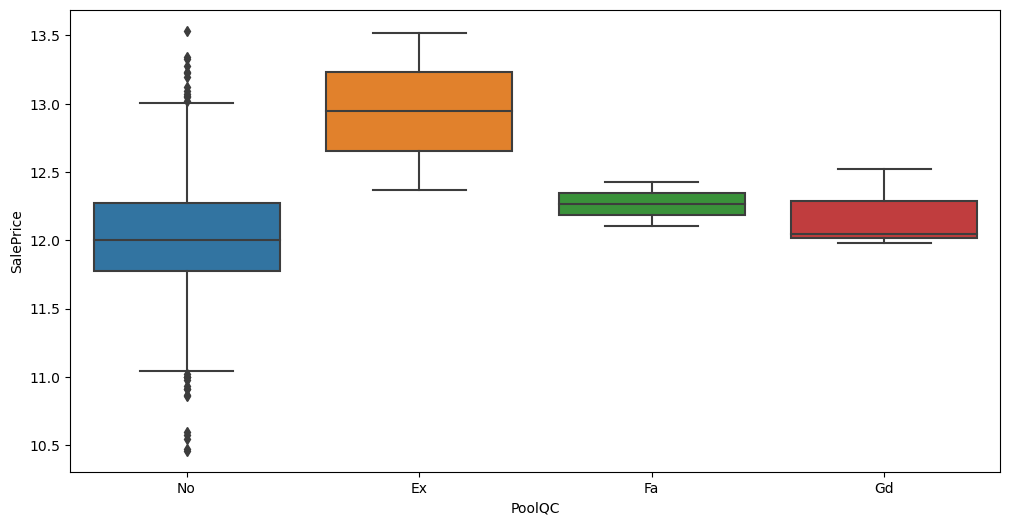

In [26]:
print(train['PoolQC'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='PoolQC', y='SalePrice', data=train)
plt.show()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64


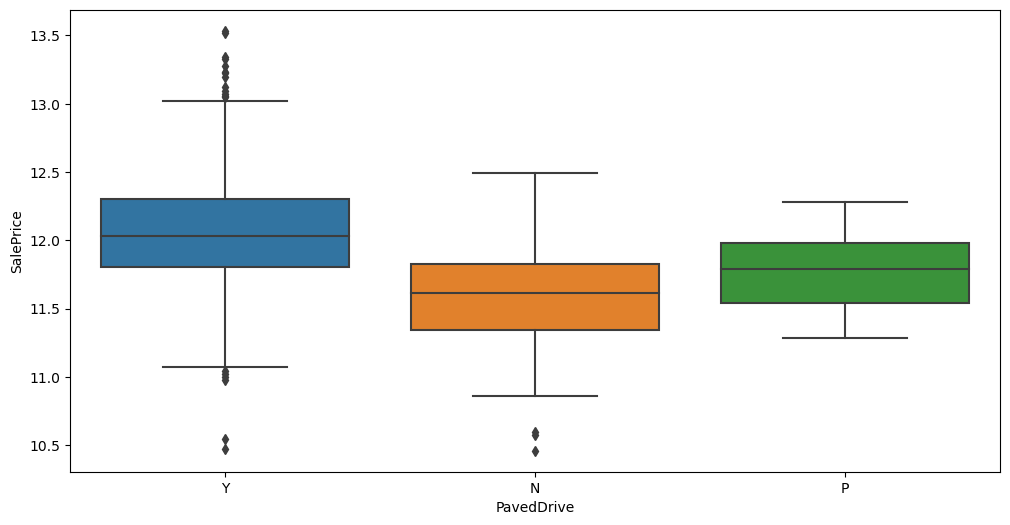

In [27]:

print(train['PavedDrive'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='PavedDrive', y='SalePrice', data=train)
plt.show()

GarageCond
TA    1326
No      81
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64


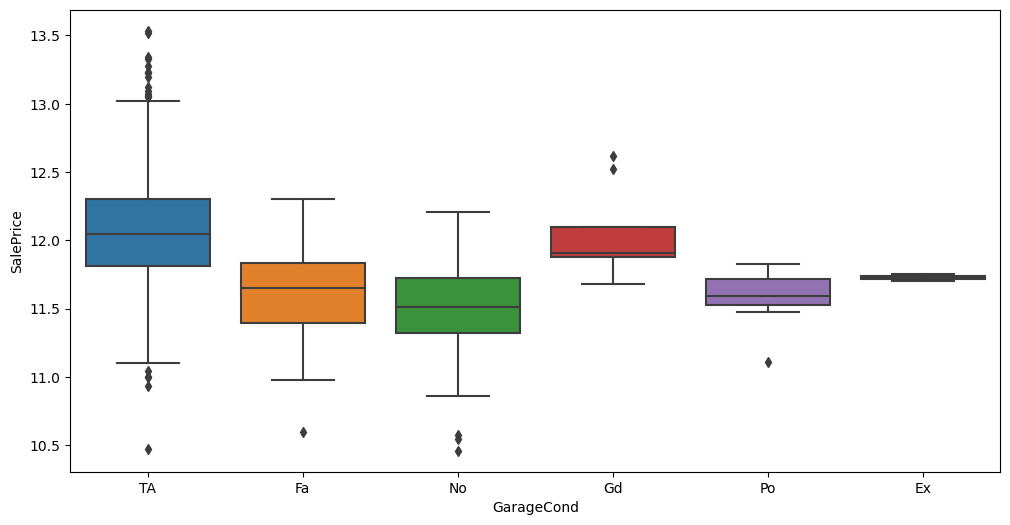

In [28]:
print(train['GarageCond'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='GarageCond', y='SalePrice', data=train)
plt.show()

GarageQual
TA    1311
No      81
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64


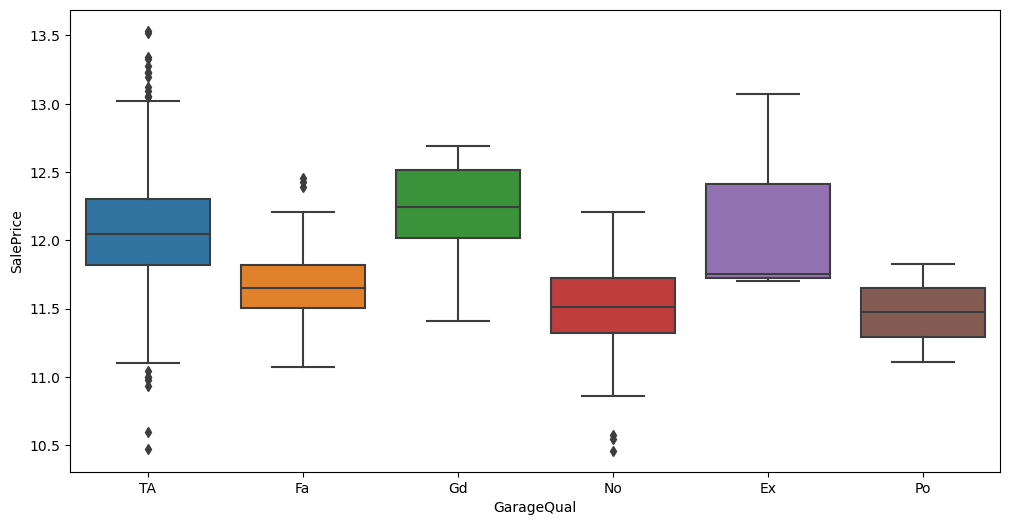

In [29]:
print(train['GarageQual'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='GarageQual', y='SalePrice', data=train)
plt.show()

GarageFinish
Unf    605
RFn    422
Fin    352
No      81
Name: count, dtype: int64


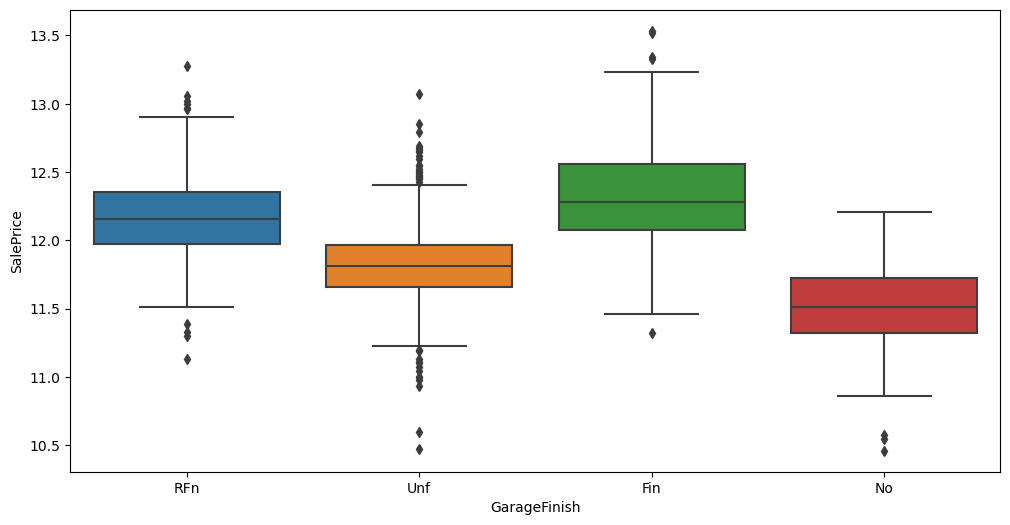

In [30]:
print(train['GarageFinish'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='GarageFinish', y='SalePrice', data=train)
plt.show()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
No          81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64


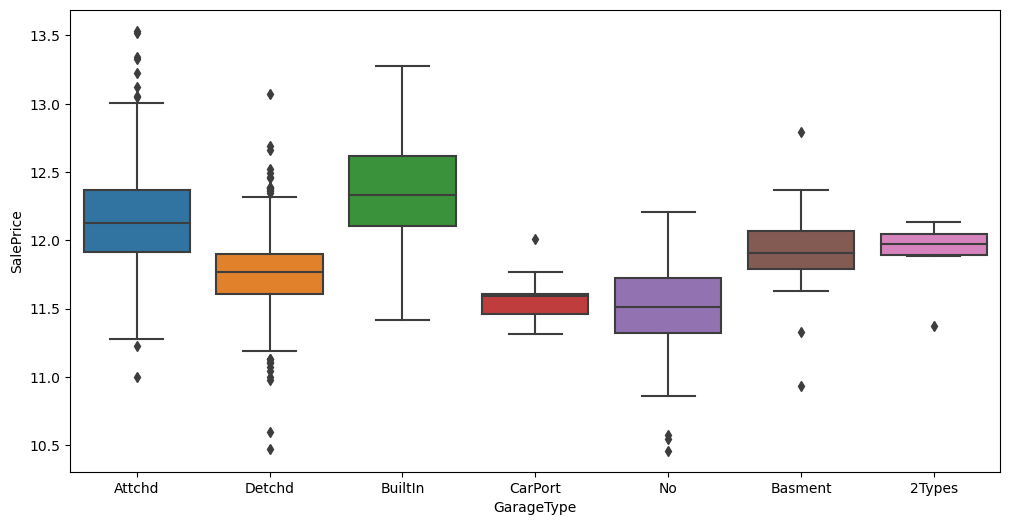

In [31]:
print(train['GarageType'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='GarageType', y='SalePrice', data=train)
plt.show()

FireplaceQu
No    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64


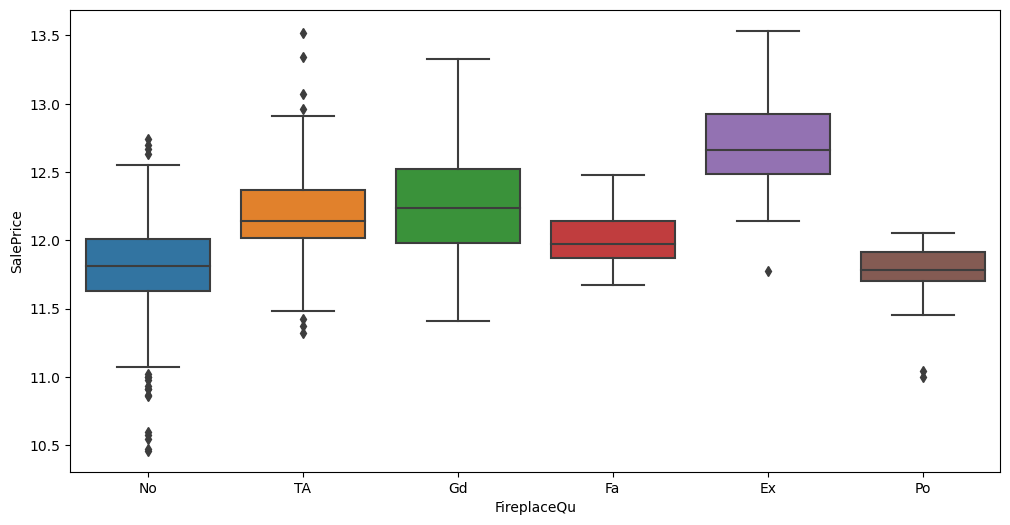

In [32]:
print(train['FireplaceQu'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='FireplaceQu', y='SalePrice', data=train)
plt.show()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64


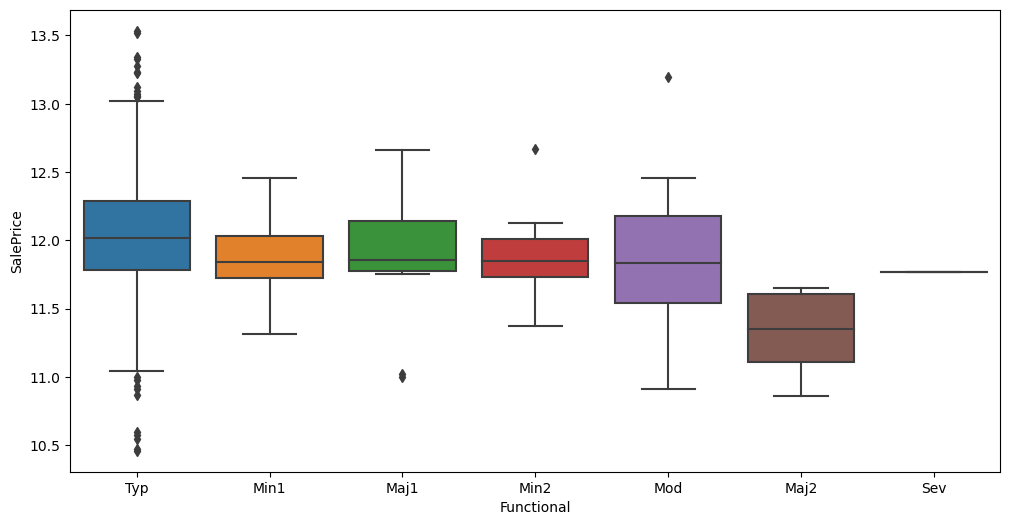

In [33]:
print(train['Functional'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Functional', y='SalePrice', data=train)
plt.show()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64


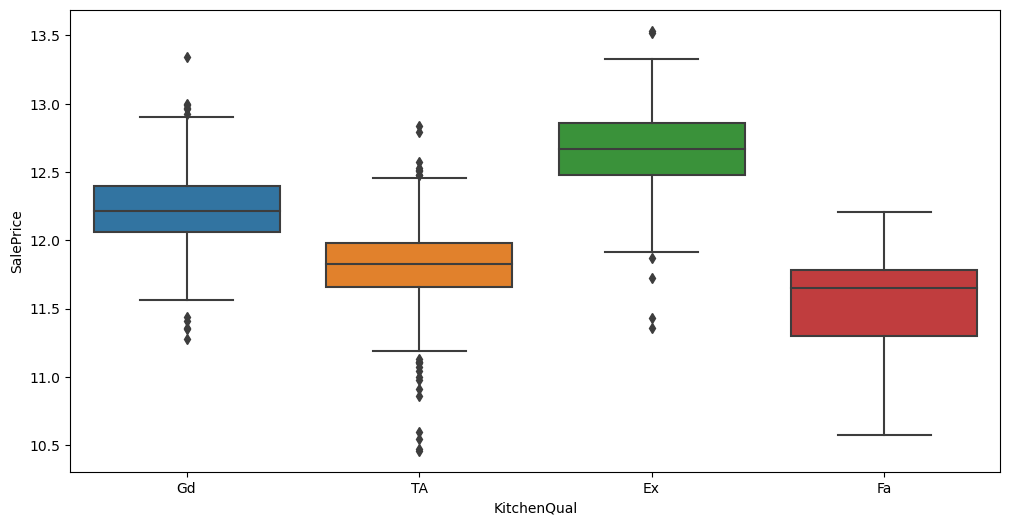

In [34]:
print(train['KitchenQual'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='KitchenQual', y='SalePrice', data=train)
plt.show()

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64


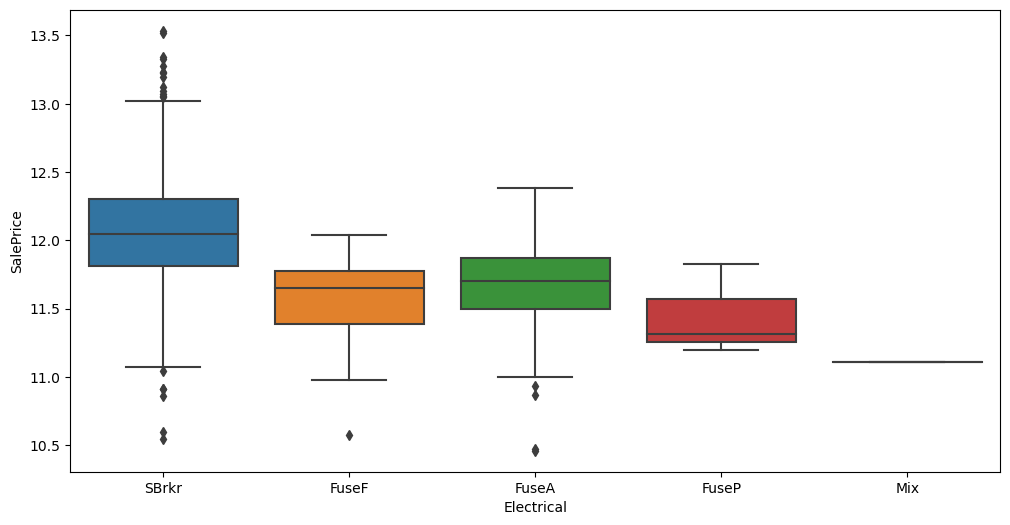

In [35]:
print(train['Electrical'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Electrical', y='SalePrice', data=train)
plt.show()

CentralAir
Y    1365
N      95
Name: count, dtype: int64


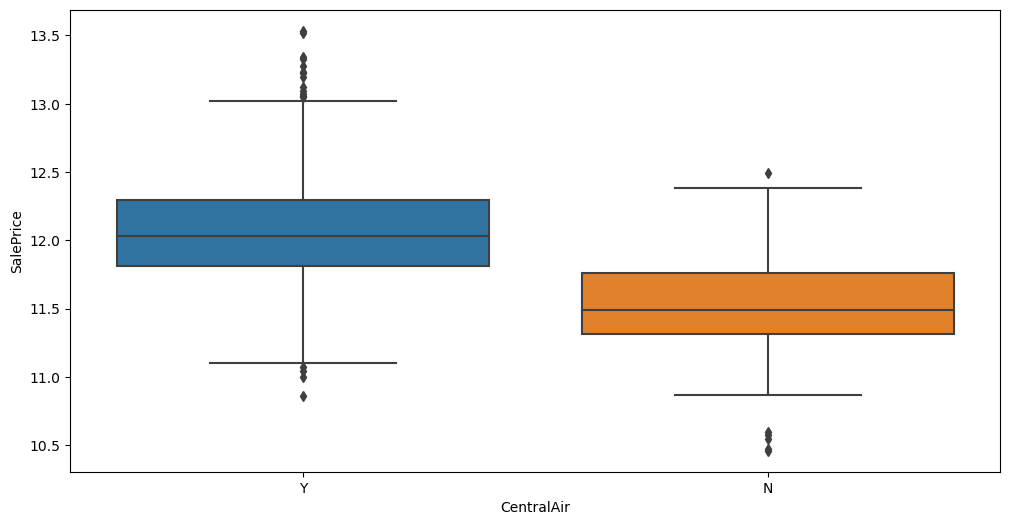

In [36]:
print(train['CentralAir'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='CentralAir', y='SalePrice', data=train)
plt.show()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64


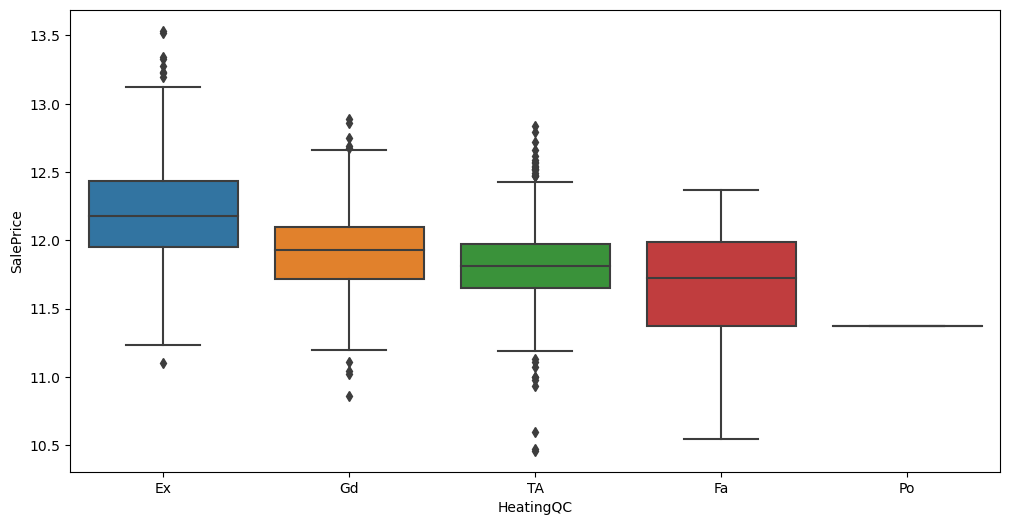

In [37]:
print(train['HeatingQC'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='HeatingQC', y='SalePrice', data=train)
plt.show()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64


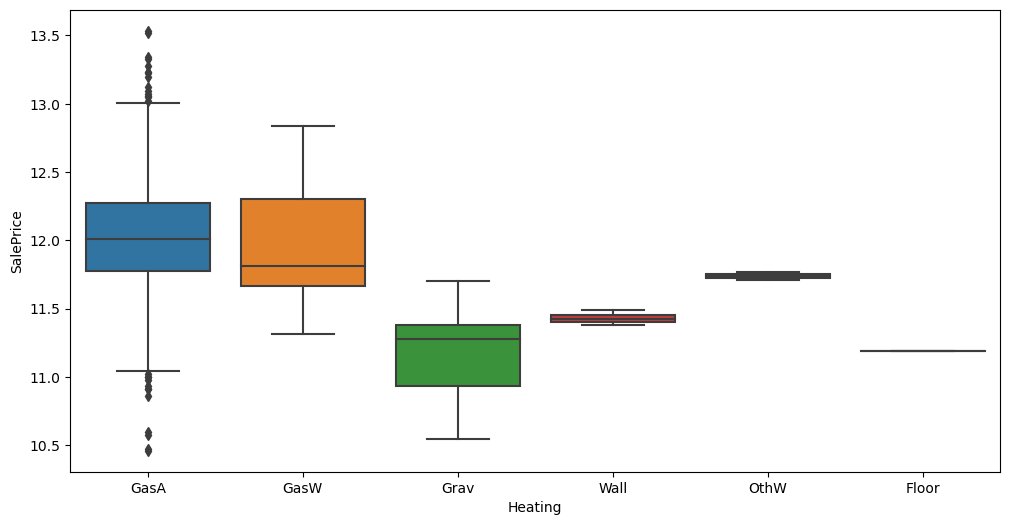

In [38]:
print(train['Heating'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Heating', y='SalePrice', data=train)
plt.show()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
No       38
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64


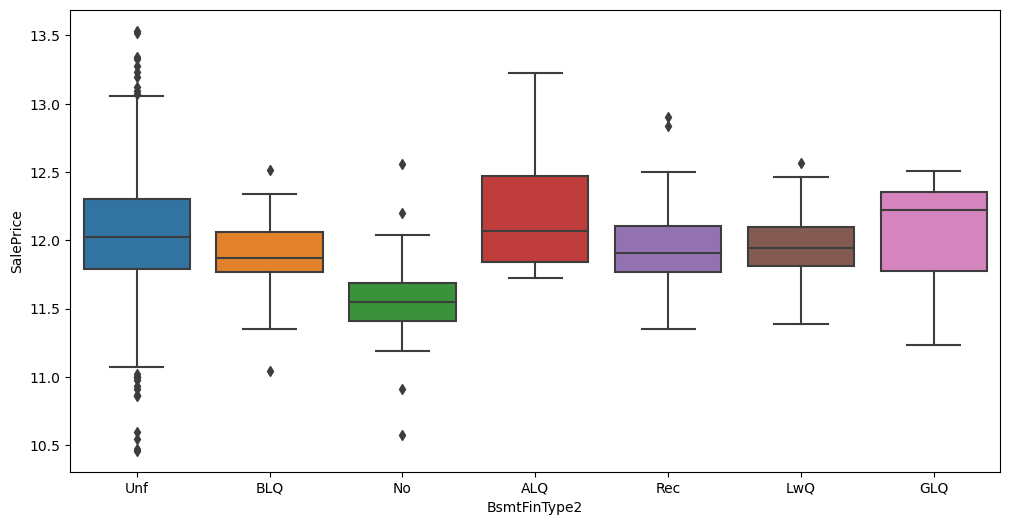

In [39]:
print(train['BsmtFinType2'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='BsmtFinType2', y='SalePrice', data=train)
plt.show()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
No      37
Name: count, dtype: int64


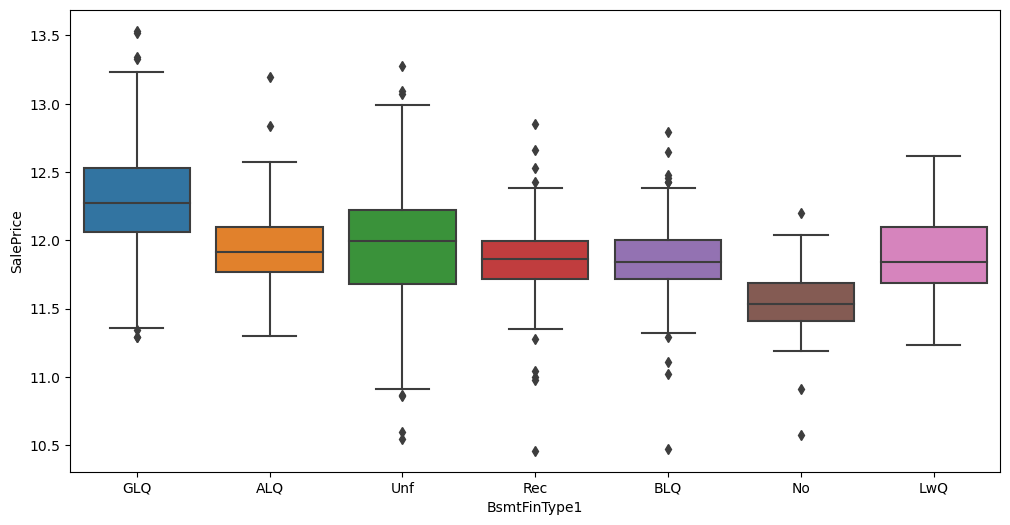

In [40]:
print(train['BsmtFinType1'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='BsmtFinType1', y='SalePrice', data=train)
plt.show()

BsmtExposure
No    991
Av    221
Gd    134
Mn    114
Name: count, dtype: int64


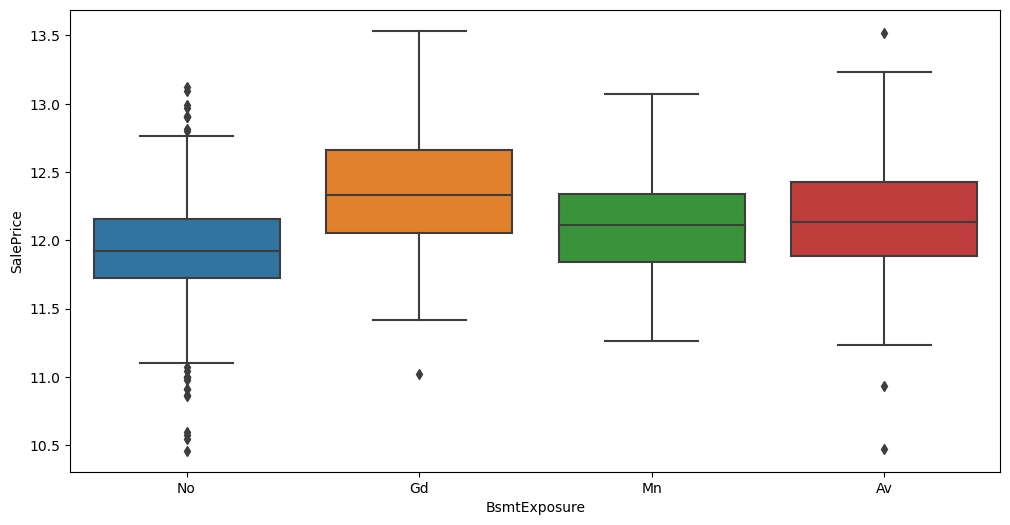

In [41]:
print(train['BsmtExposure'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='BsmtExposure', y='SalePrice', data=train)
plt.show()

BsmtCond
TA    1311
Gd      65
Fa      45
No      37
Po       2
Name: count, dtype: int64


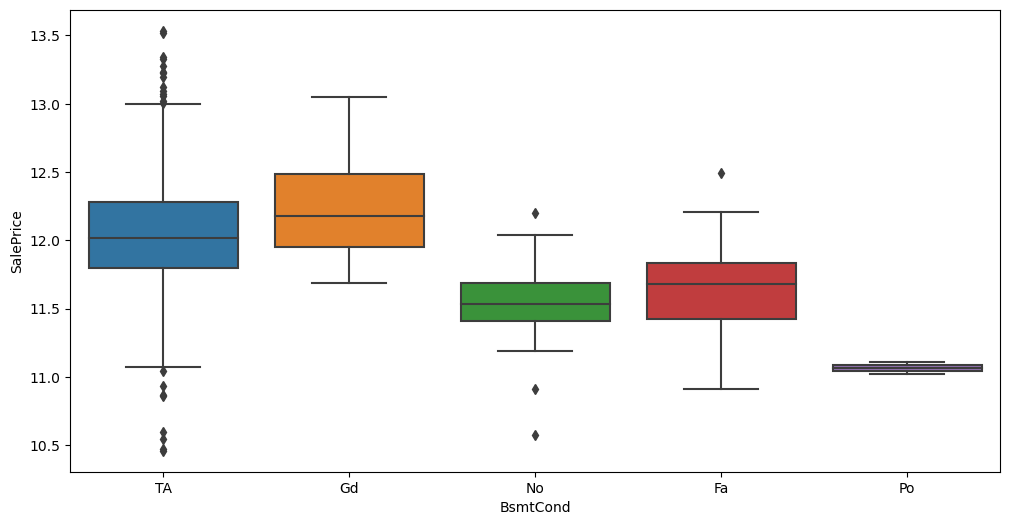

In [42]:
print(train['BsmtCond'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='BsmtCond', y='SalePrice', data=train)
plt.show()

BsmtQual
TA    649
Gd    618
Ex    121
No     37
Fa     35
Name: count, dtype: int64


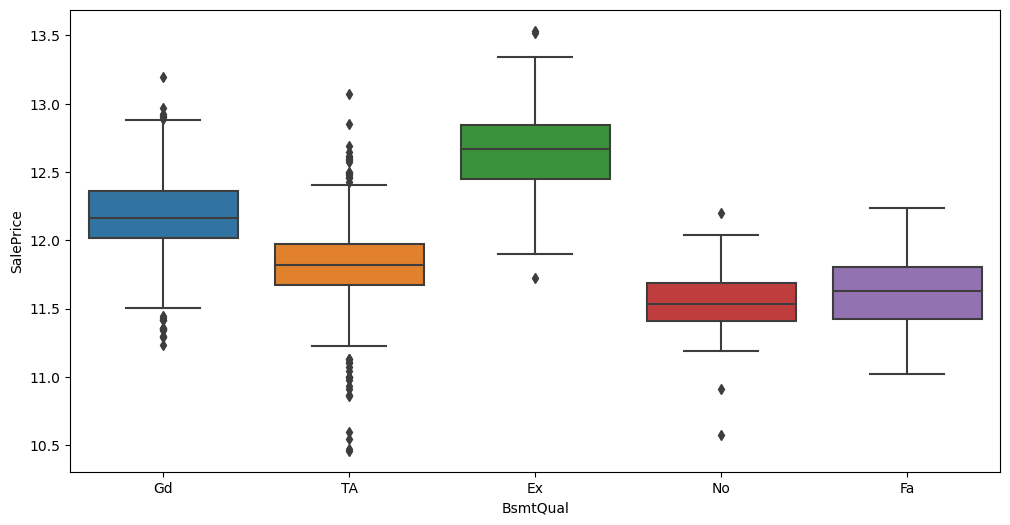

In [43]:
print(train['BsmtQual'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='BsmtQual', y='SalePrice', data=train)
plt.show()

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64


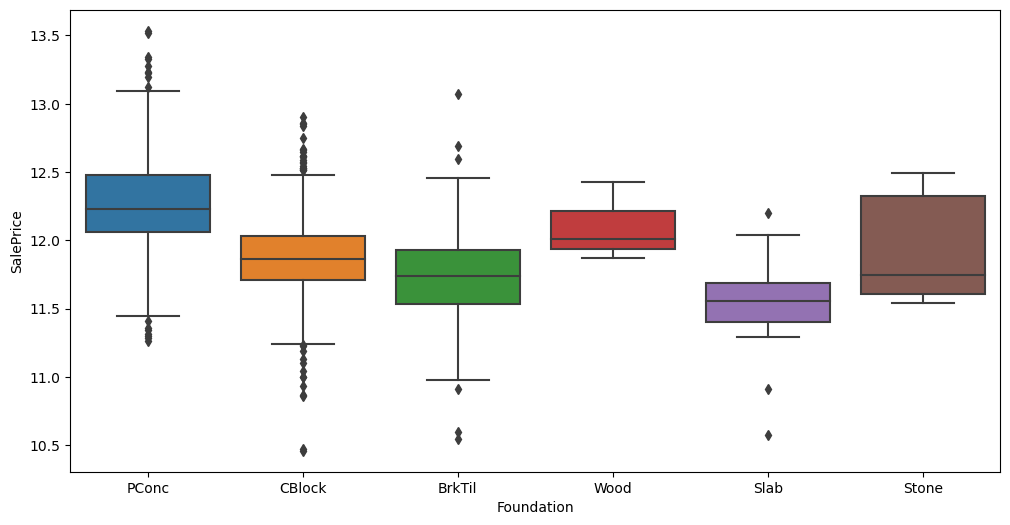

In [44]:
print(train['Foundation'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Foundation', y='SalePrice', data=train)
plt.show()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64


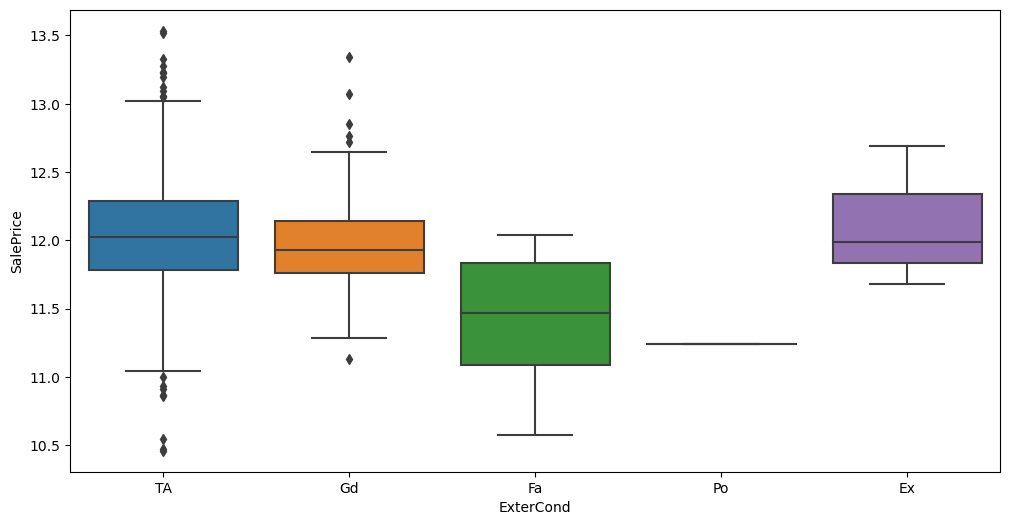

In [45]:
print(train['ExterCond'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='ExterCond', y='SalePrice', data=train)
plt.show()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64


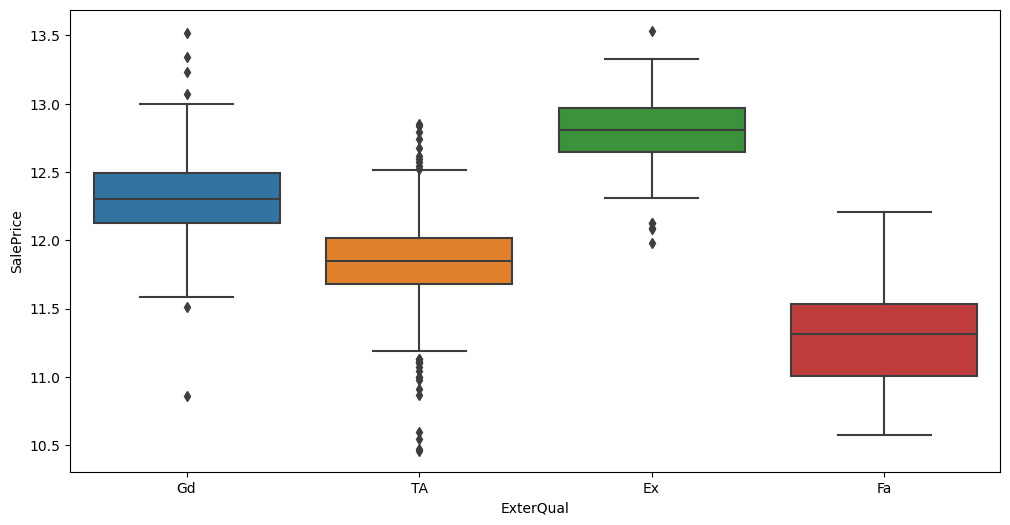

In [46]:
print(train['ExterQual'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='ExterQual', y='SalePrice', data=train)
plt.show()

MasVnrType
No         872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64


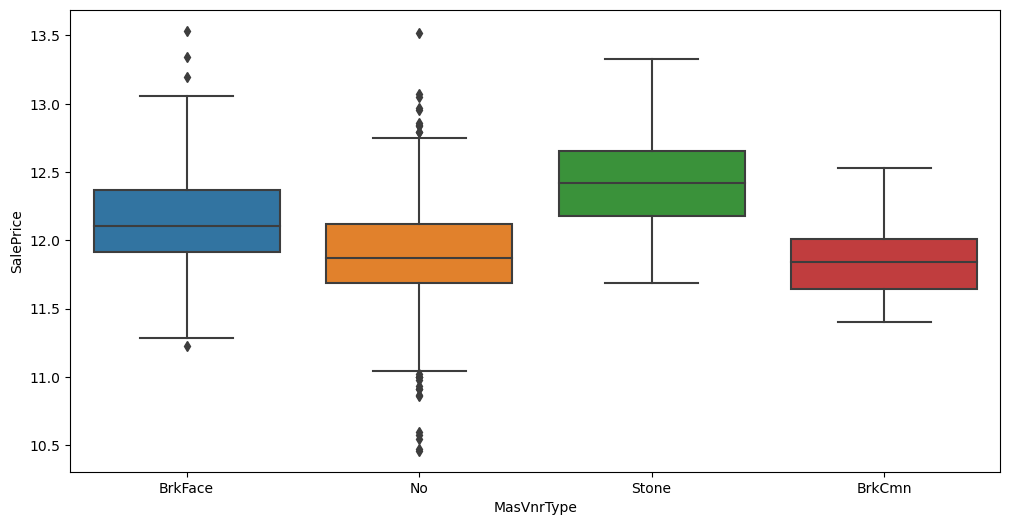

In [47]:
print(train['MasVnrType'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='MasVnrType', y='SalePrice', data=train)
plt.show()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64


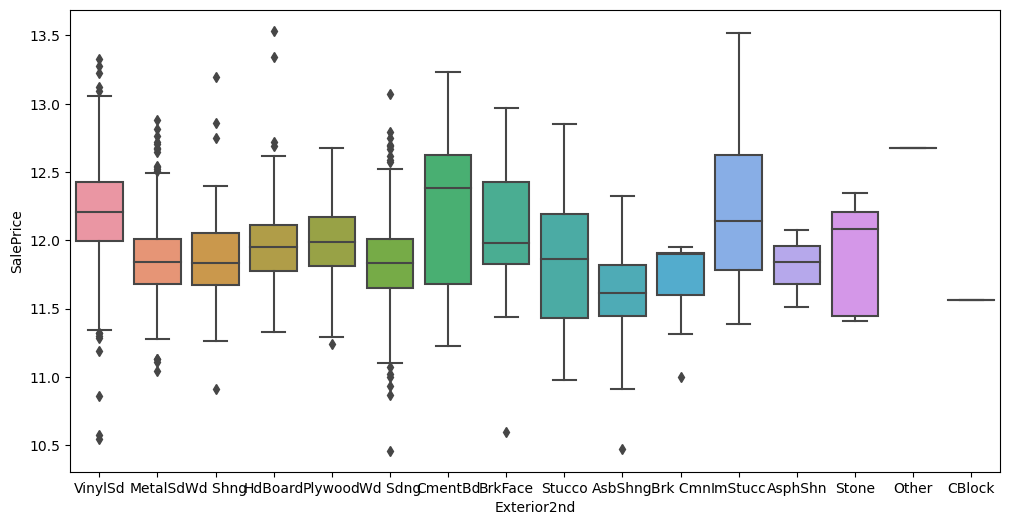

In [48]:
print(train['Exterior2nd'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Exterior2nd', y='SalePrice', data=train)
plt.show()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64


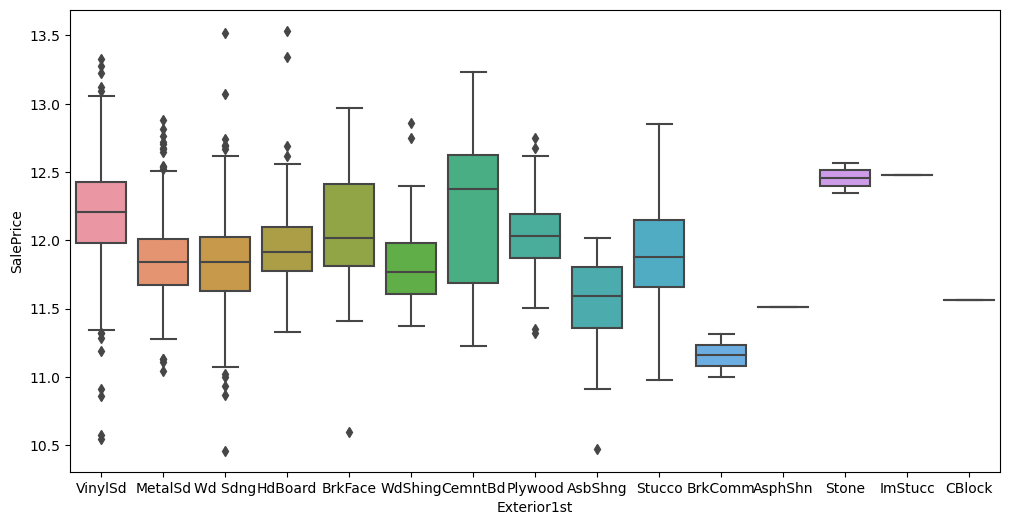

In [49]:
print(train['Exterior1st'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Exterior1st', y='SalePrice', data=train)
plt.show()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64


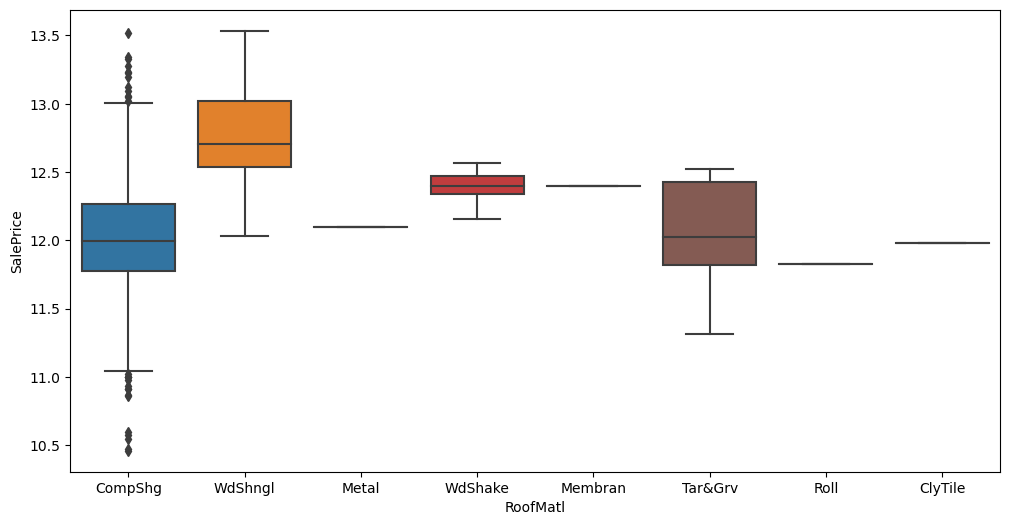

In [50]:
print(train['RoofMatl'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='RoofMatl', y='SalePrice', data=train)
plt.show()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64


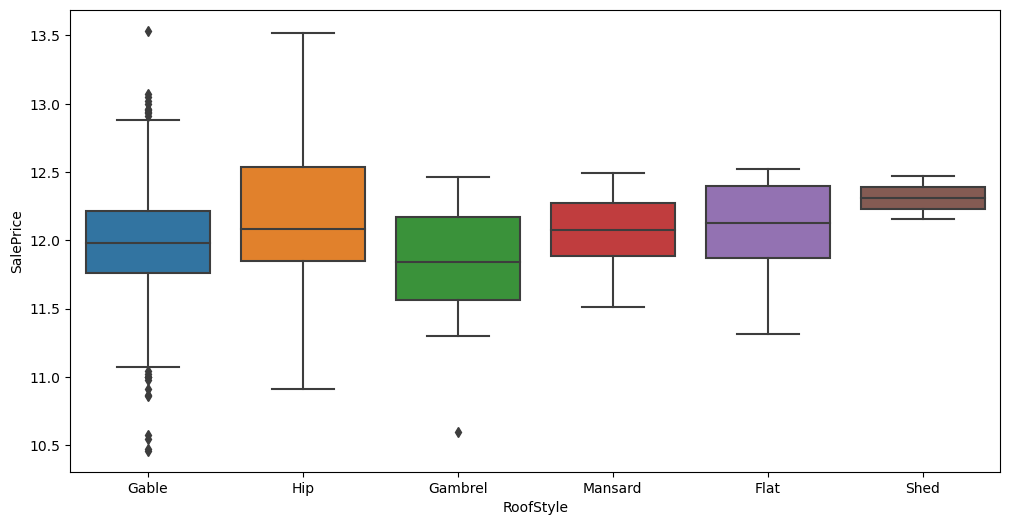

In [51]:
print(train['RoofStyle'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='RoofStyle', y='SalePrice', data=train)
plt.show()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64


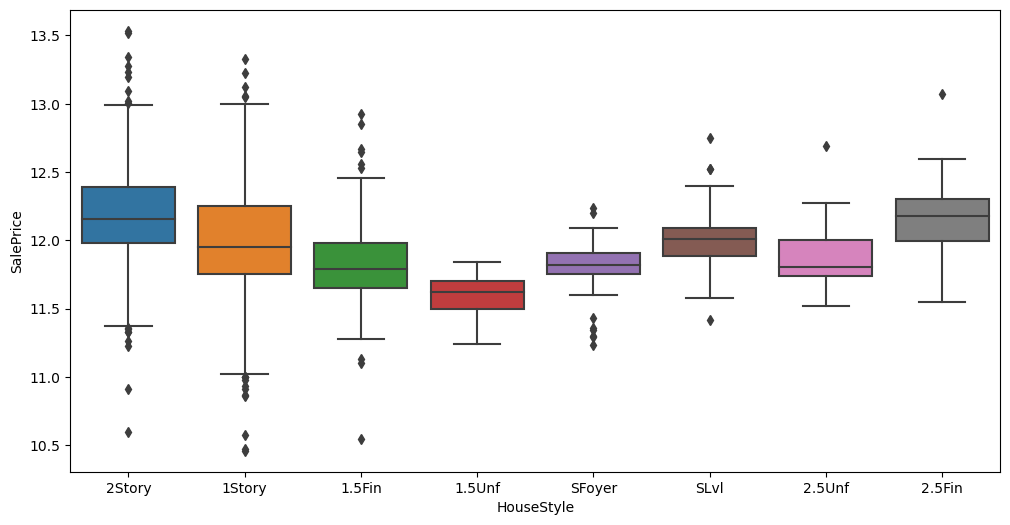

In [52]:
print(train['HouseStyle'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='HouseStyle', y='SalePrice', data=train)
plt.show()


BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64


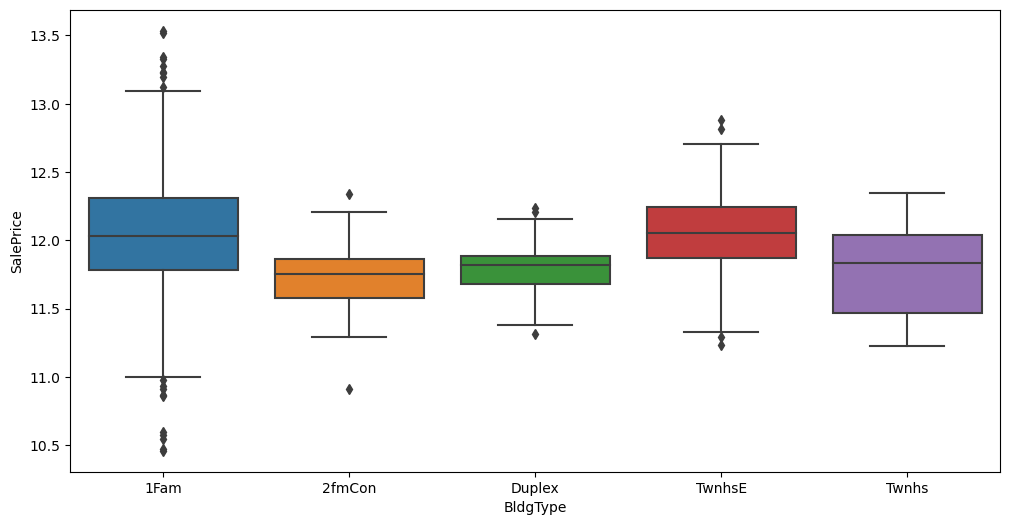

In [53]:
print(train['BldgType'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='BldgType', y='SalePrice', data=train)
plt.show()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64


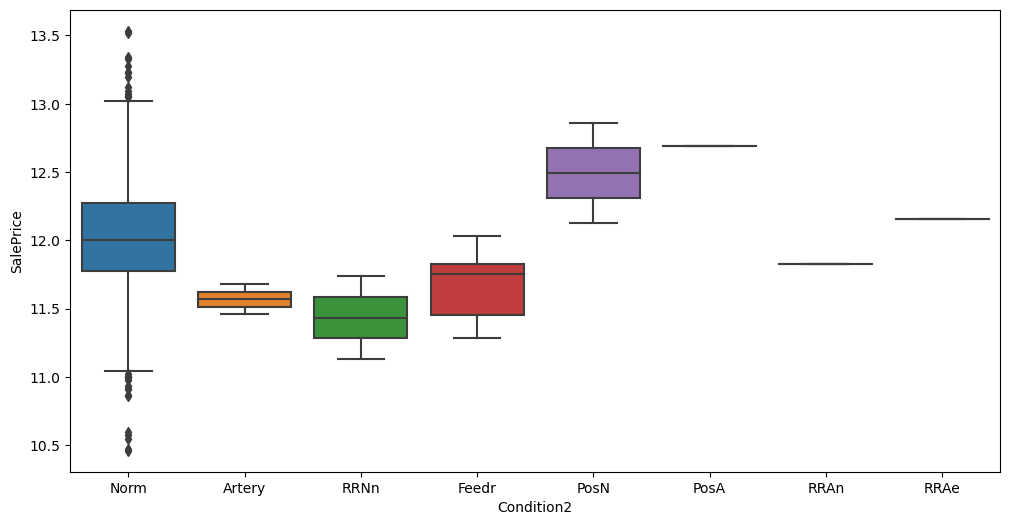

In [54]:
print(train['Condition2'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Condition2', y='SalePrice', data=train)
plt.show()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64


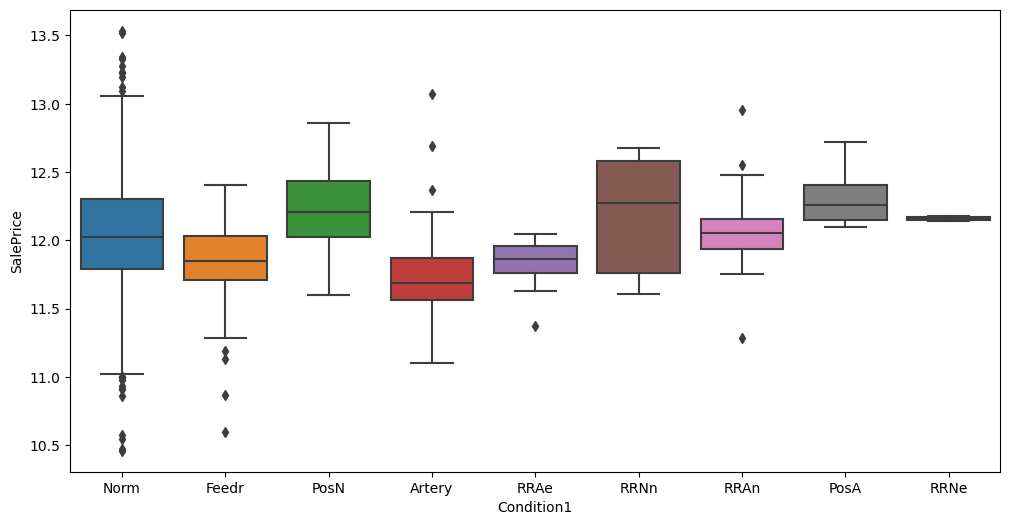

In [55]:
print(train['Condition1'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Condition1', y='SalePrice', data=train)
plt.show()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64


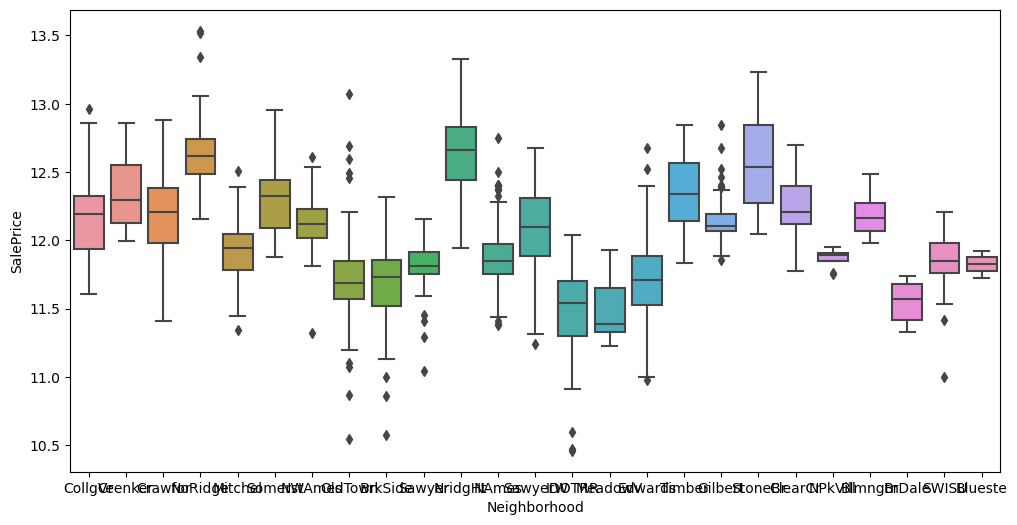

In [56]:
print(train['Neighborhood'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
plt.show()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


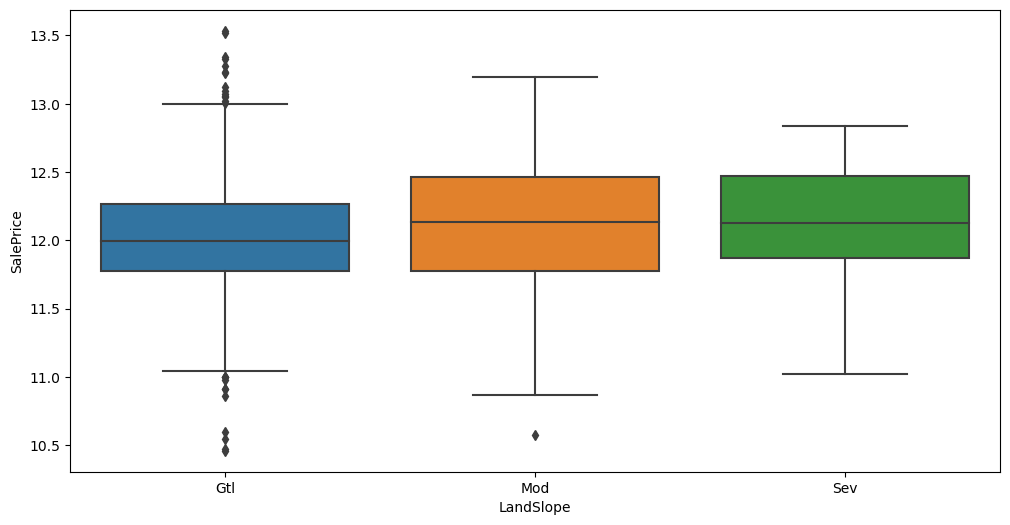

In [57]:
print(train['LandSlope'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='LandSlope', y='SalePrice', data=train)
plt.show()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


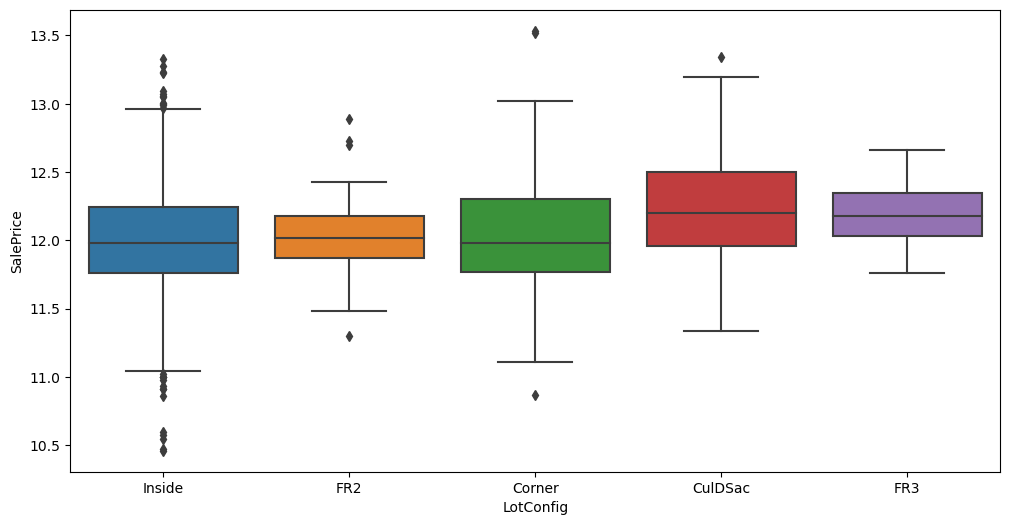

In [58]:
print(train['LotConfig'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='LotConfig', y='SalePrice', data=train)
plt.show()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


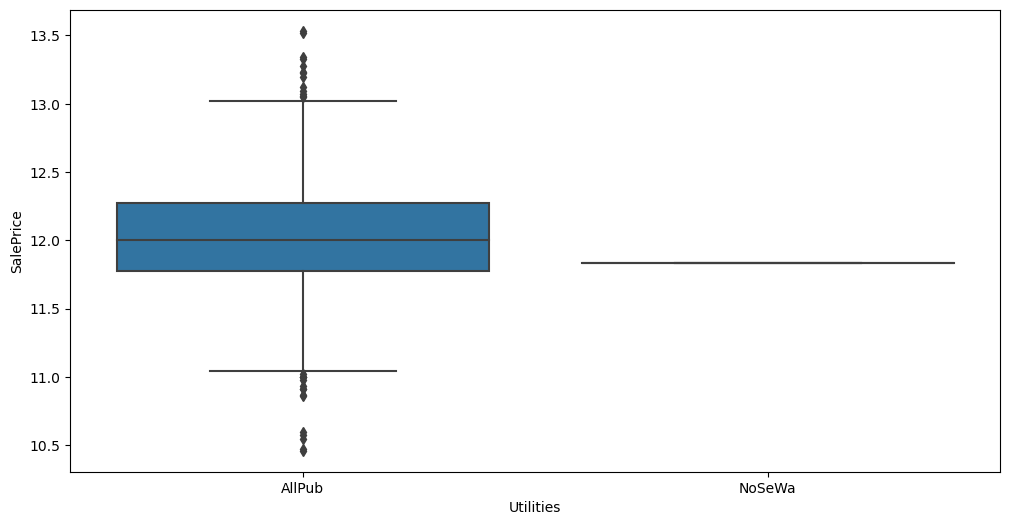

In [59]:
print(train['Utilities'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Utilities', y='SalePrice', data=train)
plt.show()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


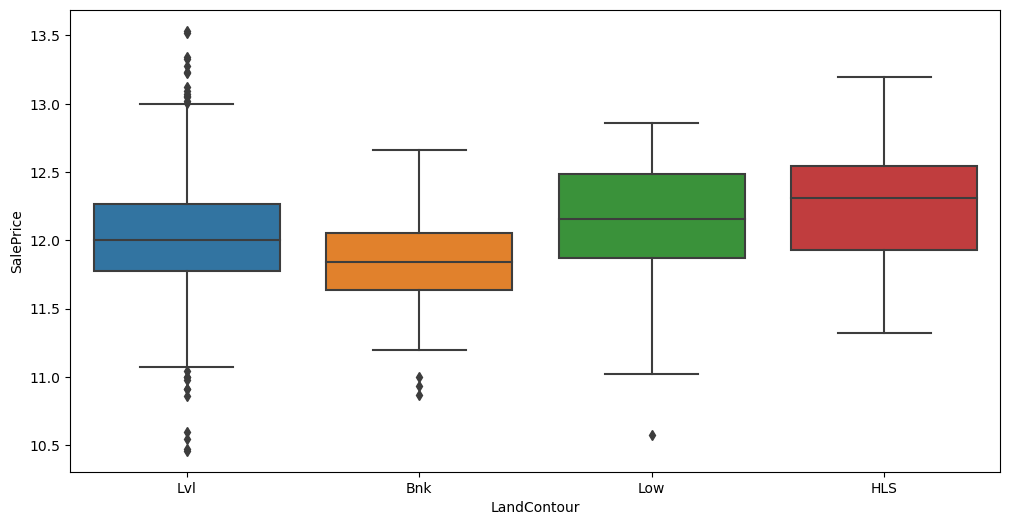

In [60]:
print(train['LandContour'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='LandContour', y='SalePrice', data=train)
plt.show()

Alley
No      1369
Grvl      50
Pave      41
Name: count, dtype: int64


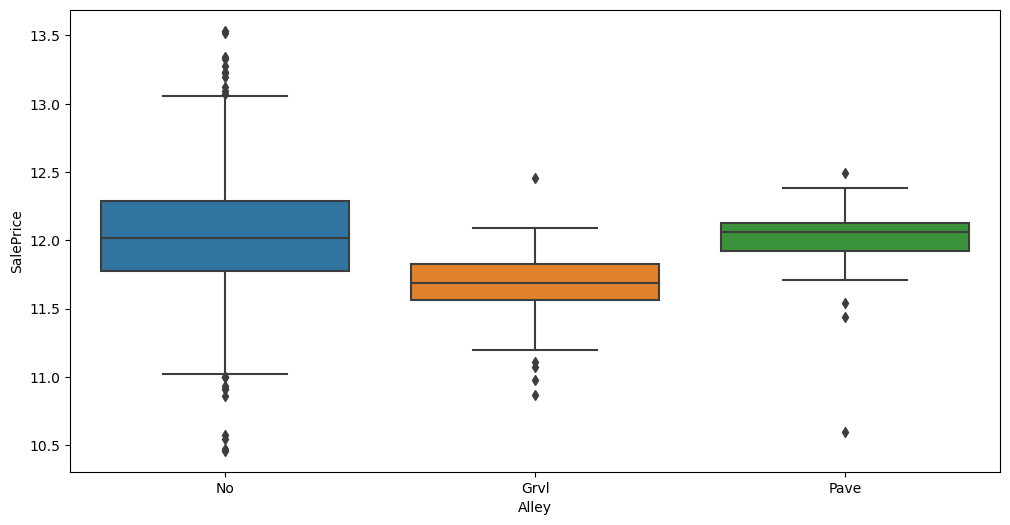

In [61]:
print(train['Alley'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Alley', y='SalePrice', data=train)
plt.show()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64


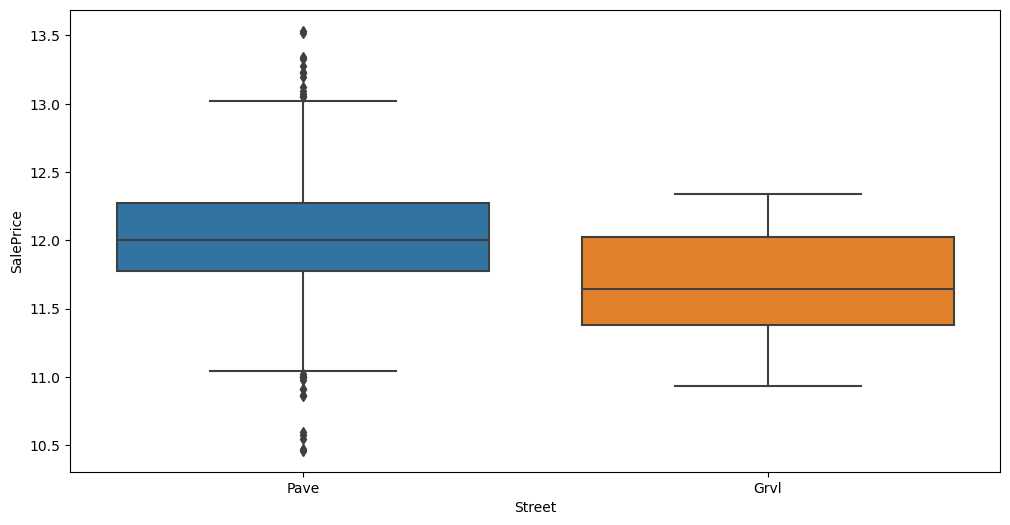

In [62]:
print(train['Street'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Street', y='SalePrice', data=train)
plt.show()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


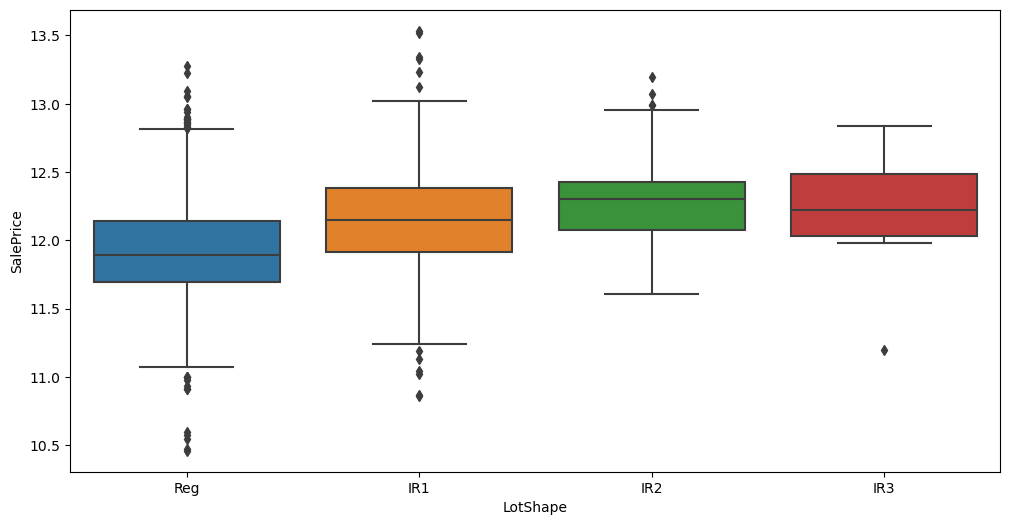

In [63]:
print(train['LotShape'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='LotShape', y='SalePrice', data=train)
plt.show()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


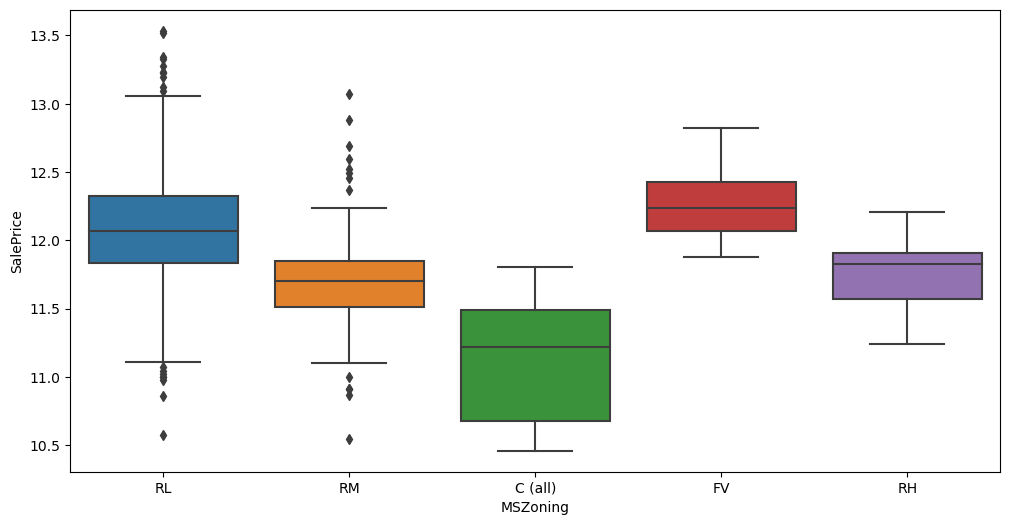

In [64]:
print(train['MSZoning'].value_counts())
plt.figure(figsize=(12, 6))
sns.boxplot(x='MSZoning', y='SalePrice', data=train)
plt.show()

In [65]:
train.shape

(1460, 56)

In [66]:
test.shape

(1459, 55)

In [67]:
train=train.drop(columns=drop_cat_columns, axis=1)
test=test.drop(columns=drop_cat_columns, axis=1)

In [68]:
train.shape

(1460, 50)

In [69]:
test.shape

(1459, 49)

In [70]:
missing_data= test.isnull().sum().sort_values(ascending=False)
missing_data=missing_data[missing_data>0.5]
missing_data

Series([], dtype: int64)

# Remove Ourliners Data

In [71]:
from sklearn import preprocessing
train.isnull().sum().sort_values(ascending=False)

MSZoning         0
FireplaceQu      0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
FullBath         0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
Alley            0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
Fence            0
SaleType         0
SaleCondition    0
Heating          0
TotalBsmtSF      0
BsmtFinType2     0
BsmtFinType1     0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
SalePrice        0
dtype: int64

# Transforming each category into an integer value

In [72]:
from sklearn.preprocessing import OrdinalEncoder

# Step 1: Separate numeric and categorical columns for train and test datasets
numeric_cols_train = train.select_dtypes(include=[np.number])
categorical_cols_train = train.select_dtypes(exclude=[np.number])

# Assuming 'test' is your test dataset
numeric_cols_test = test.select_dtypes(include=[np.number])
categorical_cols_test = test.select_dtypes(exclude=[np.number])

# Step 2: Apply OrdinalEncoder to categorical columns
ordinal_encoder = OrdinalEncoder()

# Fit on train and transform both train and test
categorical_encoded_train = pd.DataFrame(ordinal_encoder.fit_transform(categorical_cols_train), columns=categorical_cols_train.columns)
categorical_encoded_test = pd.DataFrame(ordinal_encoder.transform(categorical_cols_test), columns=categorical_cols_test.columns)

# Step 3: Combine the encoded categorical features with numeric features
train = pd.concat([numeric_cols_train, categorical_encoded_train], axis=1)
test = pd.concat([numeric_cols_test, categorical_encoded_test], axis=1)

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1459 non-null   int64  
 1   YearBuilt      1459 non-null   int64  
 2   YearRemodAdd   1459 non-null   int64  
 3   TotalBsmtSF    1459 non-null   float64
 4   1stFlrSF       1459 non-null   int64  
 5   GrLivArea      1459 non-null   int64  
 6   FullBath       1459 non-null   int64  
 7   TotRmsAbvGrd   1459 non-null   int64  
 8   Fireplaces     1459 non-null   int64  
 9   GarageYrBlt    1459 non-null   float64
 10  GarageCars     1459 non-null   float64
 11  GarageArea     1459 non-null   float64
 12  MSZoning       1459 non-null   float64
 13  Alley          1459 non-null   float64
 14  LotShape       1459 non-null   float64
 15  LandContour    1459 non-null   float64
 16  LotConfig      1459 non-null   float64
 17  LandSlope      1459 non-null   float64
 18  Neighbor

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   YearBuilt      1460 non-null   int64  
 2   YearRemodAdd   1460 non-null   int64  
 3   TotalBsmtSF    1460 non-null   int64  
 4   1stFlrSF       1460 non-null   int64  
 5   GrLivArea      1460 non-null   int64  
 6   FullBath       1460 non-null   int64  
 7   TotRmsAbvGrd   1460 non-null   int64  
 8   Fireplaces     1460 non-null   int64  
 9   GarageYrBlt    1460 non-null   float64
 10  GarageCars     1460 non-null   int64  
 11  GarageArea     1460 non-null   int64  
 12  SalePrice      1460 non-null   float64
 13  MSZoning       1460 non-null   float64
 14  Alley          1460 non-null   float64
 15  LotShape       1460 non-null   float64
 16  LandContour    1460 non-null   float64
 17  LotConfig      1460 non-null   float64
 18  LandSlop

# Preparing data to train

In [75]:
from sklearn.model_selection import train_test_split
X = train.drop(columns=['SalePrice'])  # Drop the target column from the features
y = train['SalePrice']  # Target column

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: check the size of the resulting splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 1168
Test set size: 292


# Linear Regression

In [76]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
models = {"Linear Regression": LinearRegression()}
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    r2 = r2_score(y_test, predictions)
    results[name] = r2
    print(f"{name} - Accuracy: {r2}")

# Print the best performing model
best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name} with Accuracy: {results[best_model_name]}")

Linear Regression - Accuracy: 0.863118925808539
Best Model: Linear Regression with Accuracy: 0.863118925808539


# Find best params to models

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
model = LinearRegression()
scaler = StandardScaler()

# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for LinearRegression (though this model has limited parameters)
param_grid = {
    'fit_intercept': [True, False]  # The main parameter to tune
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated R^2 Score: {best_score}")

# Use the best model to predict on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Calculate and print the R^2 score for the test set
test_r2 = r2_score(y_test, predictions)
print(f"Test R^2 Score: {test_r2}")

Best Parameters: {'fit_intercept': True}
Best Cross-Validated R^2 Score: 0.8393529043888884
Test R^2 Score: 0.863118925808539


# Now training model with all data

In [78]:
print(X.shape)
print(y.shape)
print(test.shape)

(1460, 49)
(1460,)
(1459, 49)


In [79]:
model.fit(X, y)
y_pred = model.predict(test)
y_pred=np.exp(y_pred)

In [80]:
submission = pd.DataFrame({
    'Id': test_id,
    'SalePrice': y_pred
})

In [81]:
submission.to_csv(r"C:\Users\siddartha\Downloads\house-prices-advanced-regression-techniques\sample_submission.csv", index=False)